# **Analysis of customer aggregation dataset using UNSUPERVISED methods**
## by AFZAL QURESHI

    Unsupervised models used:
        K-means
        DBSCAN
        Agglomerative (hierarchical)

    Scores used for evaluating:
        Silhouette score: Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a
                           clustering technique. 
                           
                           Its value ranges from -1 to 1.                       
                           1: Means clusters are well apart from each other and clearly distinguished.
                           0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
                          -1: Means clusters are assigned in the wrong way.
                          
                          Silhouette Score = (b-a)/max(a,b)
                          where
                          a= average intra-cluster distance i.e the average distance between each point within a cluster.
                          b= average inter-cluster distance i.e the average distance between all clusters.
                          
        Calinski Harabasz score:The Calinski-Harabasz index (also known as the Variance Ratio Criterion) is calculated
                                as a ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion
                                for all clusters (where the dispersion is the sum of squared distances). 
                                
                                A high CH means better clustering since observations in each cluster are closer together 
                                (more dense), while clusters themselves are further away from each other (well separated).
                                
                                The Calinski-Harabasz index is calculated as:

                                       BGSS/(K-1)      BGSS*(N−K)
                               CH =   ------------ =  ------------
                                       WGSS/(N−K)      WGSS*(K−1)

                                where:
                                    BGSS : between-group sum of squares (between-group dispersion)
                                    WGSS : within-group sum of squares (within-group dispersion)
                                    N : total number of observations
                                    K : total number of clusters
                                

# Import various libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

from scipy.cluster import hierarchy

import matplotlib.cm as cm
import matplotlib.style as style
style.use("seaborn-darkgrid")

# Loading data

In [2]:
df=pd.read_csv('shopping_data.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Selecting 'Annual Income (k$)' , 'Spending Score (1-100)' columns for simple visualisations

In [5]:
columns=['Annual Income (k$)' , 'Spending Score (1-100)']
X=df.loc[:, columns]

### scaling

In [6]:
#initialising minmax scaler
scaler_MM=MinMaxScaler()

# fit and transform data
X=scaler_MM.fit_transform(X)  

X[:10]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ]])

# Visualising data : looks like there are atleast 5 clusters are present

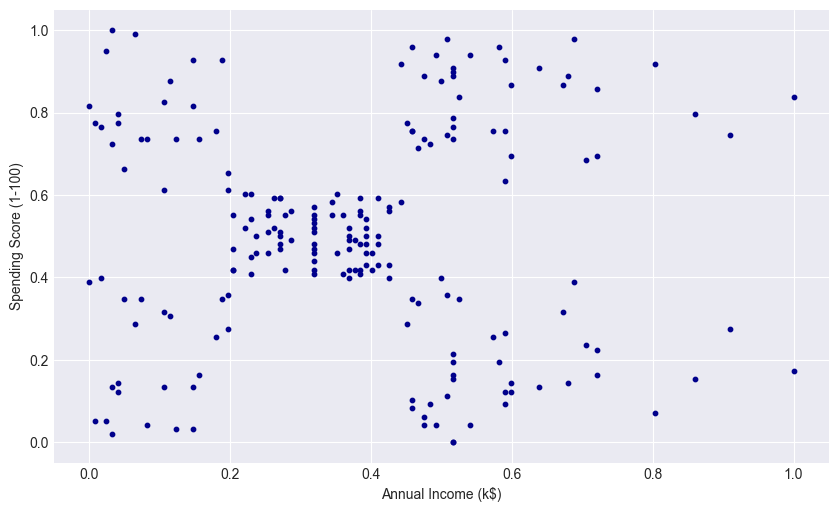

In [7]:
plt.figure(figsize=(10,6), dpi=100)
plt.scatter(X[:,0] ,X[:,1], s=10, c='darkblue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Creating dataframe to store details of various models

In [8]:
indices=['Silhouette score', 'CH score', 'Best clusters sil', 'Best clusters CH','Best Params sil', 'Best Params ch']
df_scores=pd.DataFrame(index=indices) 
df_scores

Empty DataFrame
Columns: []
Index: [Silhouette score, CH score, Best clusters sil, Best clusters CH, Best Params sil, Best Params ch]

# **using Kmeans**

### silhouette analysis

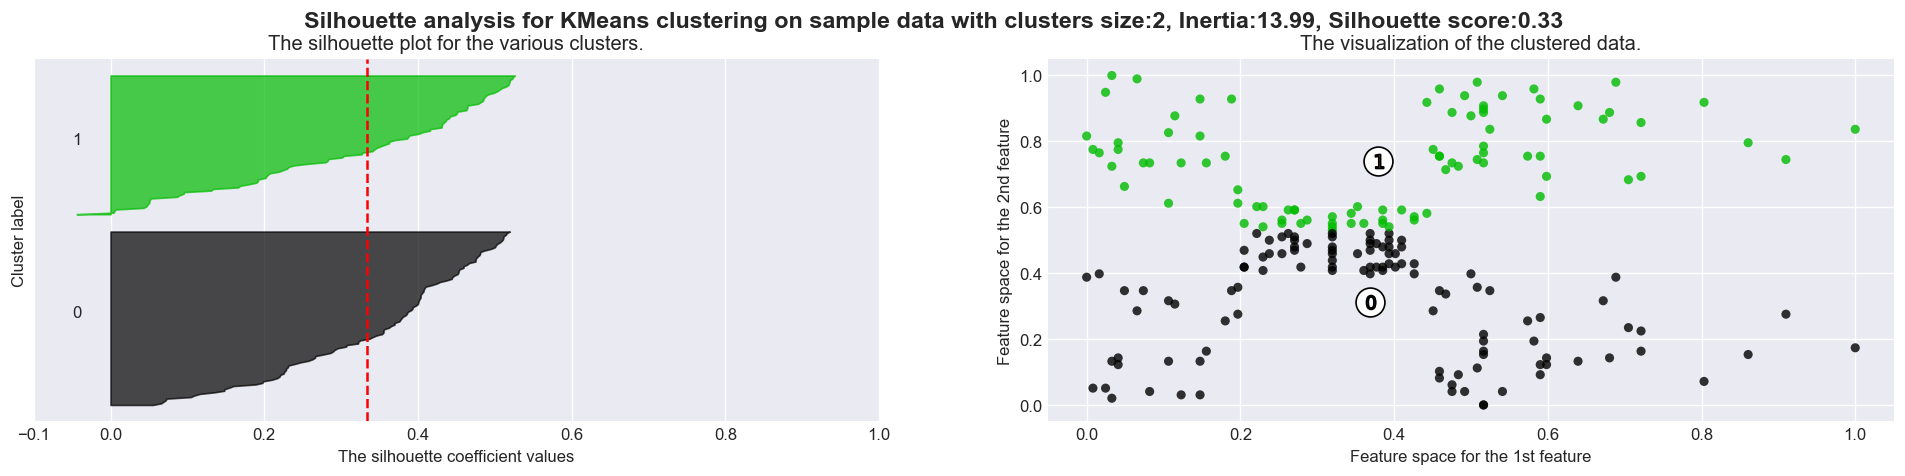

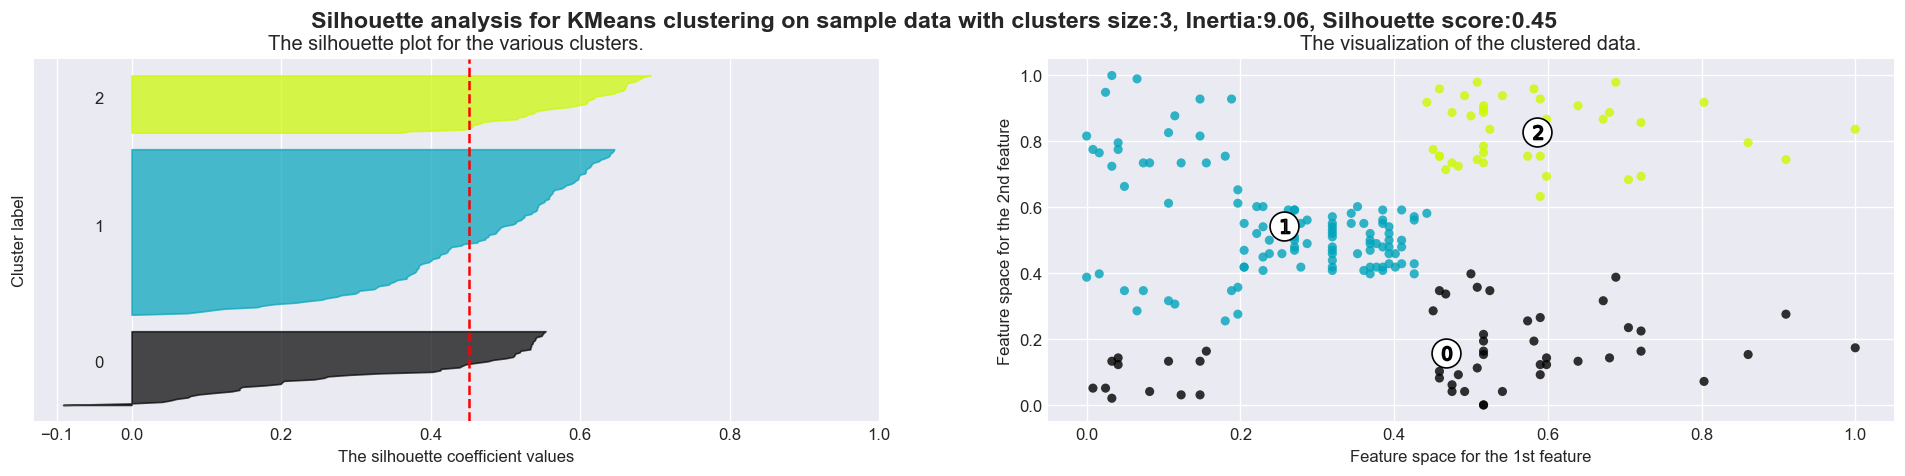

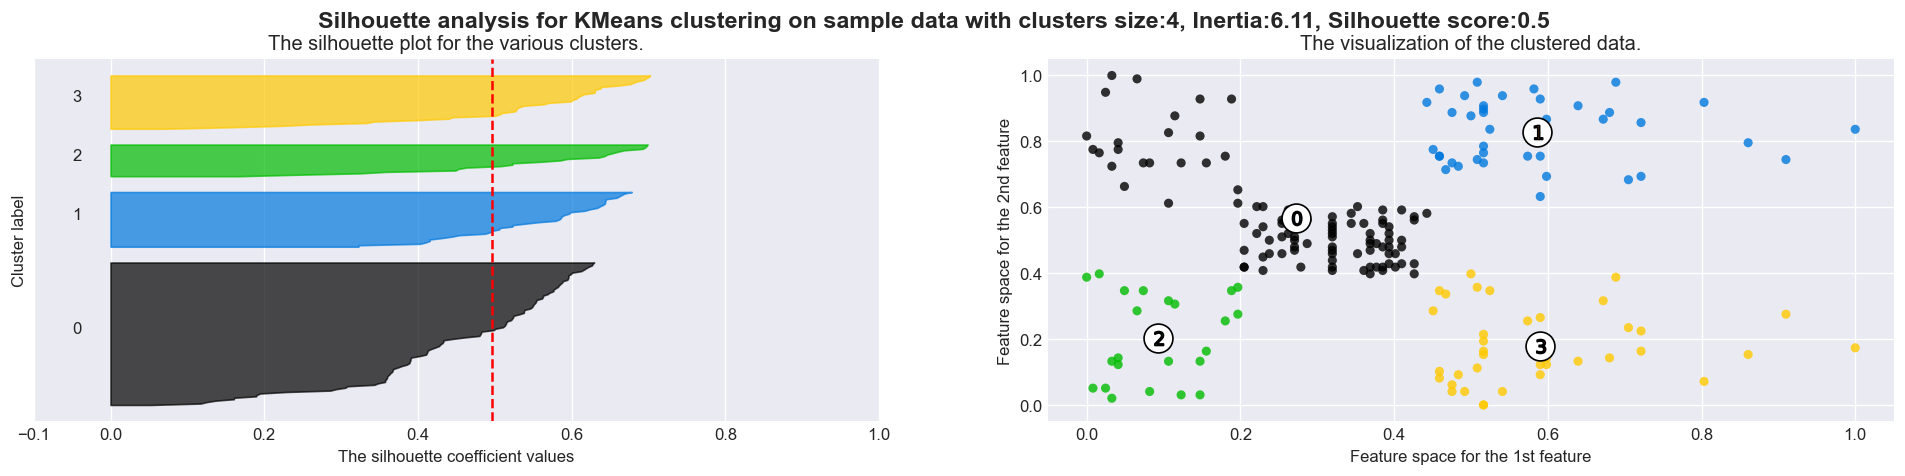

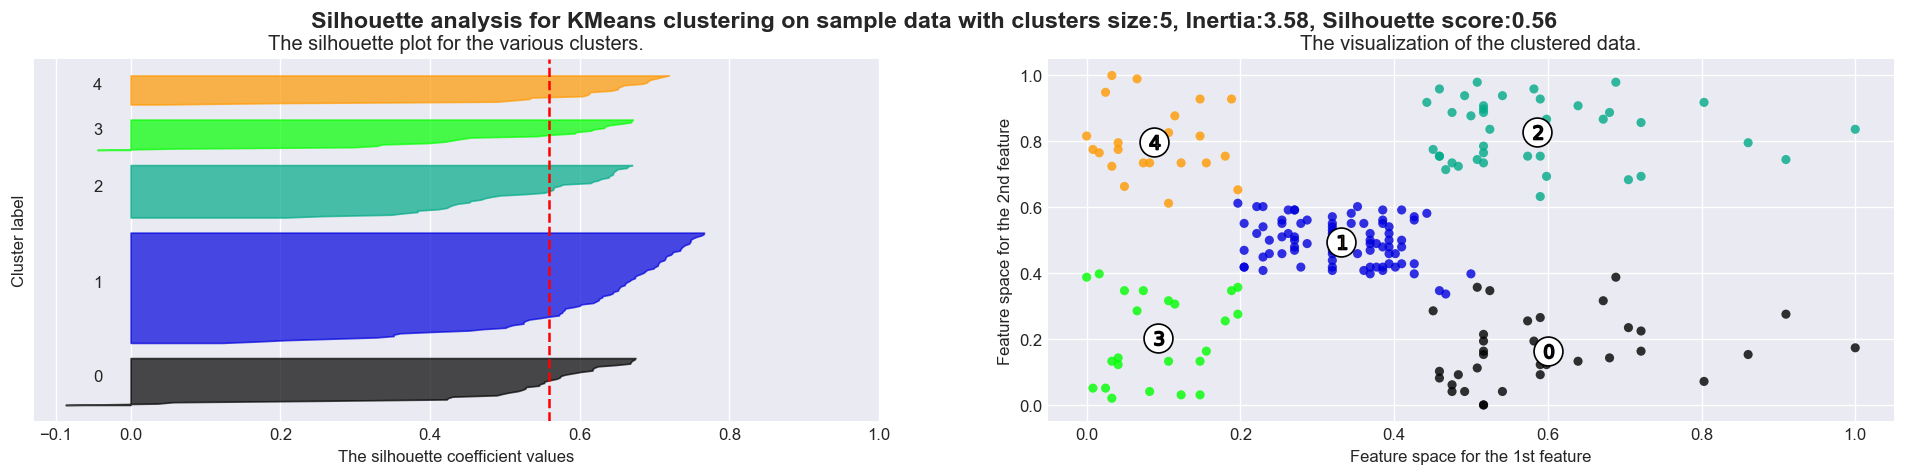

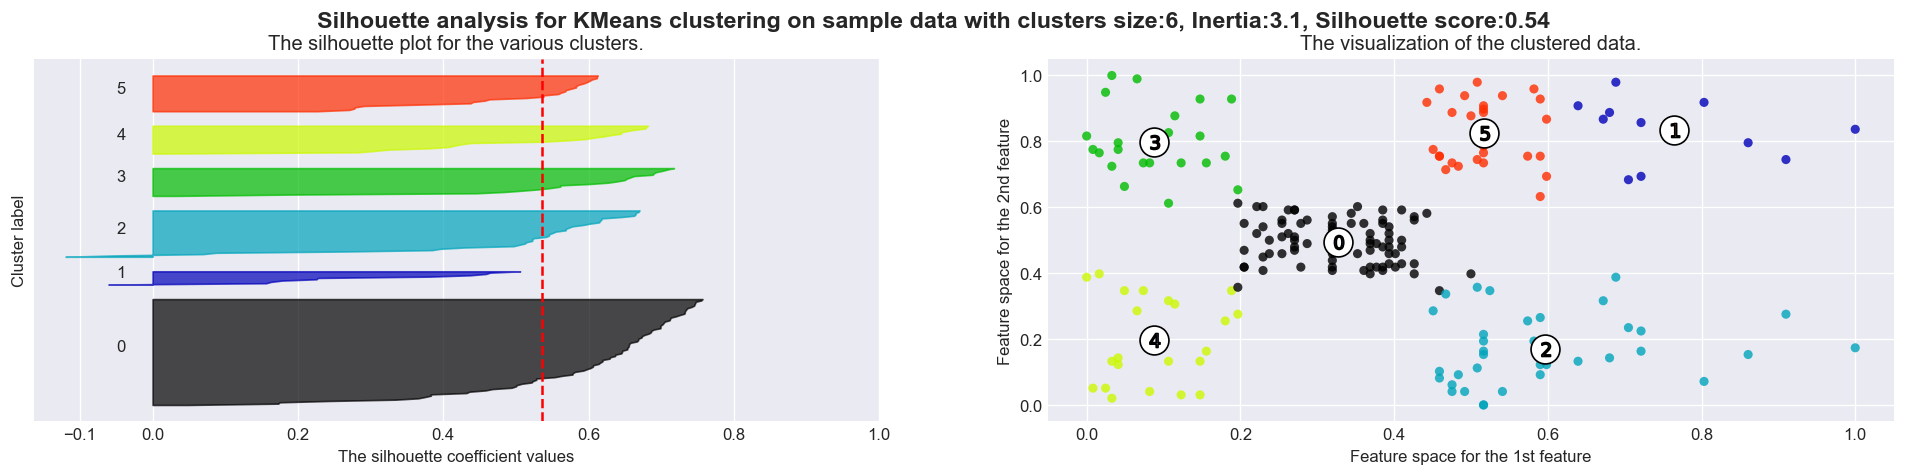

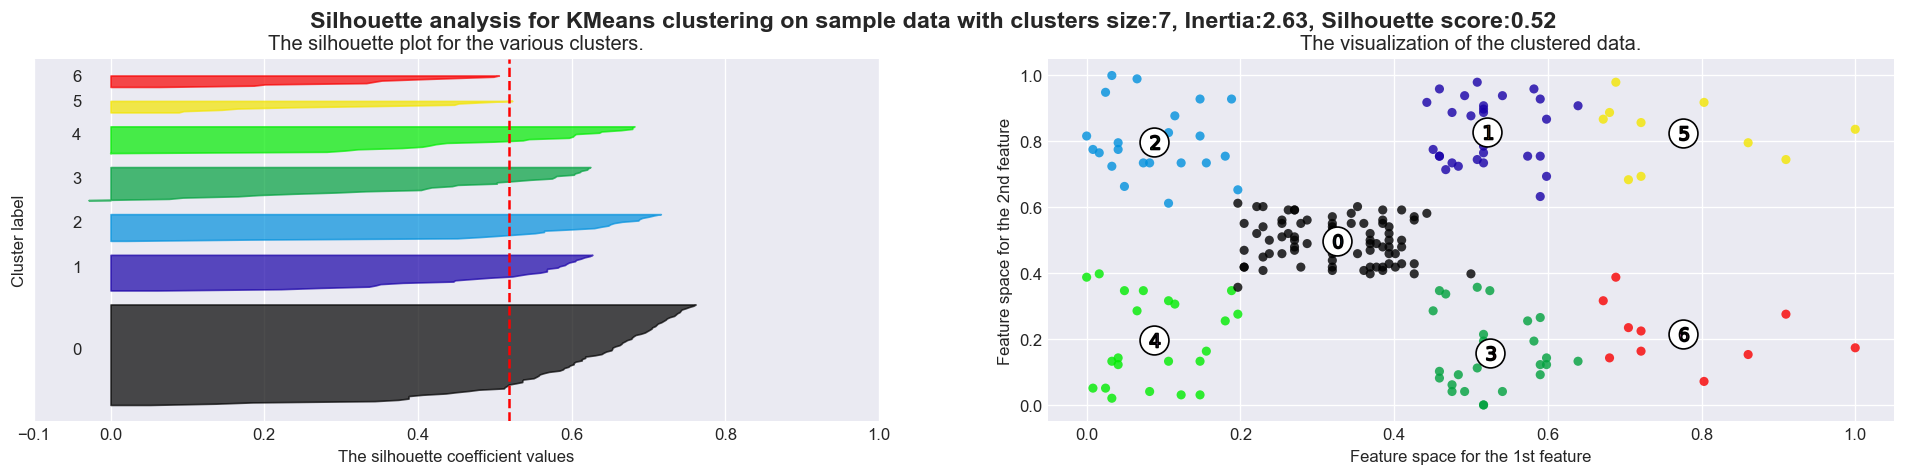

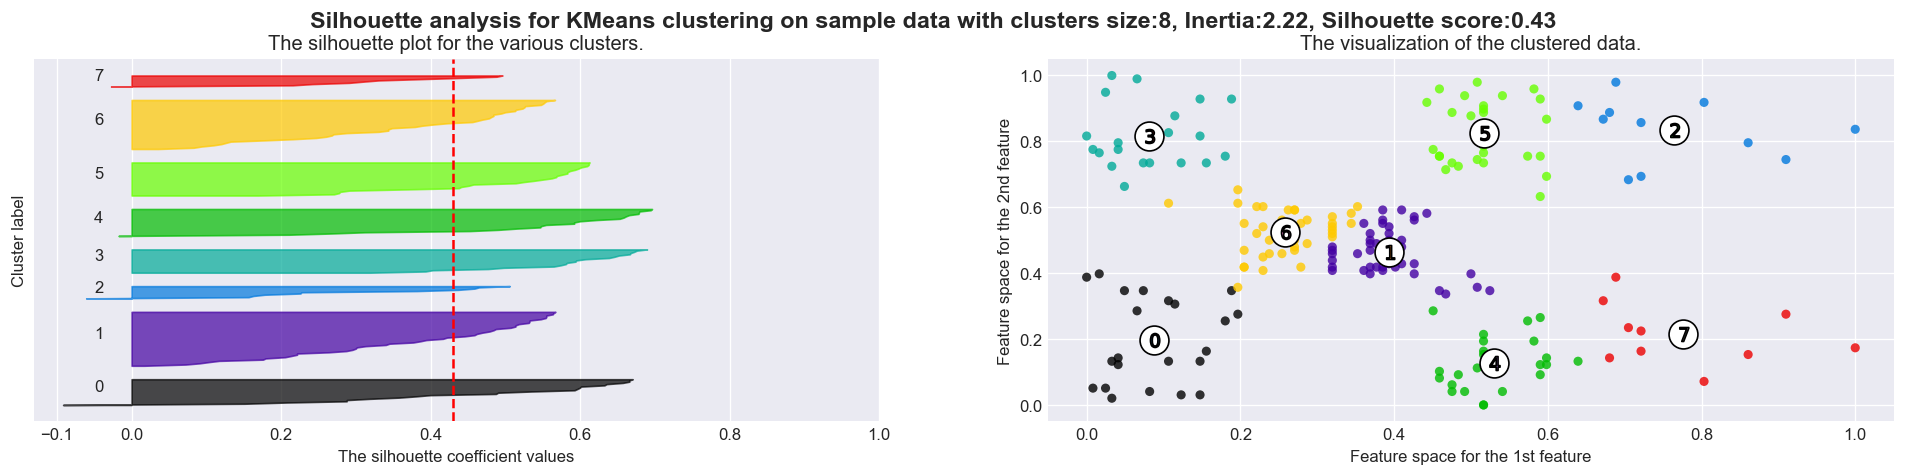

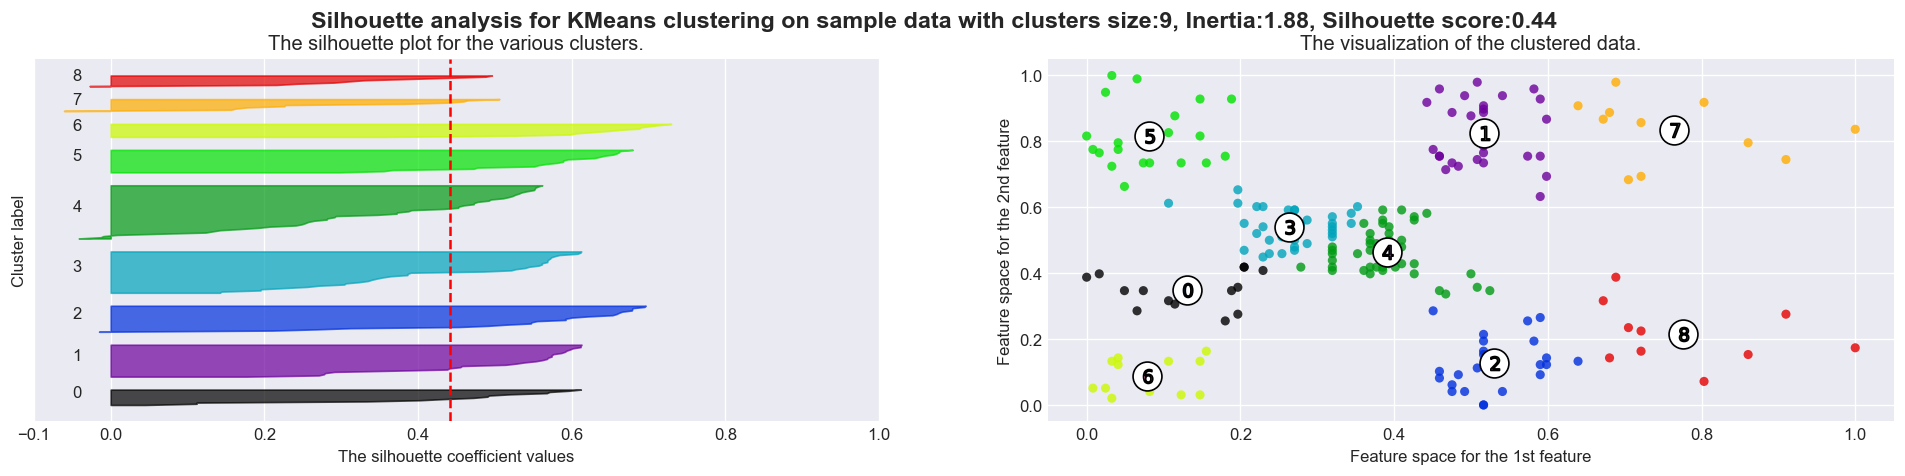

In [9]:
score_sil=np.array([])     # storing scores to plot against cluster size
score_ch=np.array([])  

params=np.array([])      # to store parameters of models

silhouette_avg_n_clusters = []    # for plotting purpose

score_inertia=np.array([])      # to plot cluster vs inertia (elbow point) 

clusters=np.arange(2,10) # various cluster sizes for kmeans model
for k in clusters:
    
    '''MODEL'''
    # initialise and fit model
    model_km=KMeans(n_clusters=k).fit(X)
    
    # get labels for data points
    labels= model_km.labels_
    
    # store parameters for future reference
    params=np.append(params, model_km.get_params() )
    
    # get cluster centers
    centers = model_km.cluster_centers_
    
    
    '''STORING VARIOUS SCORE VALUES'''
    # store inertia values for the cluster size
    inertia=model_km.inertia_
    score_inertia=np.append(score_inertia, inertia)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)
    
    # avg silhouette score for the clustering
    silhouette_avg=silhouette_score(X,labels)
    
    # storing silhouette and CH scores for each cluster size in an array 
    score_sil=np.append(score_sil, silhouette_avg)
    score_ch=np.append(score_ch, calinski_harabasz_score(X,labels))
    
    
    '''PLOTTING'''
     # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=120)
    fig.set_size_inches(20, 4)

    
    '''FIRST PLOT'''
    # COMPUTING AND PLOTTING SILHOUETTE PLOT FOR EACH CLUSTER
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging tocluster i, and sort them
        ith_cluster_silhouette_values =  sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    '''SECOND PLOT '''
    # SHOWING THE ACTUAL CLUSTERS FORMED
    colors = cm.nipy_spectral(labels.astype(float) / k)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=120, lw=0, alpha=0.8, c=colors, edgecolor='k')

    # Labeling the clusters
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=300, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=70, edgecolor='k')

    # SETTING TITLES AND LABELS
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle( (f"Silhouette analysis for KMeans clustering on sample data with clusters size:{k}, Inertia:{ round(inertia,2) }, Silhouette score:{ round(silhouette_avg,2) }"),
                 fontsize=14, fontweight='bold')

    plt.show()

### plotting inertia for various clusters : elbow point seems to be at 5 clusters

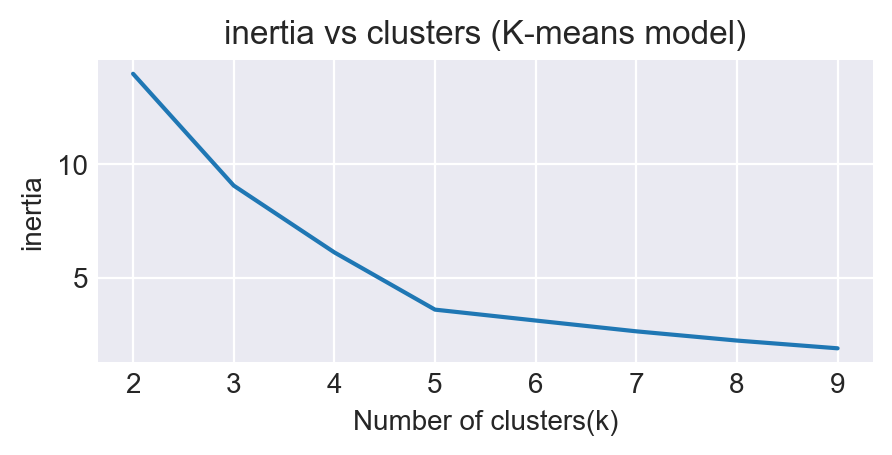

In [10]:
plt.figure(figsize=(5,2), dpi=200)
plt.plot(list(clusters),score_inertia)
plt.xlabel('Number of clusters(k)')
plt.ylabel('inertia')
plt.xticks(clusters)
plt.title('inertia vs clusters (K-means model)')
plt.show()

### plotting scores for various clusters

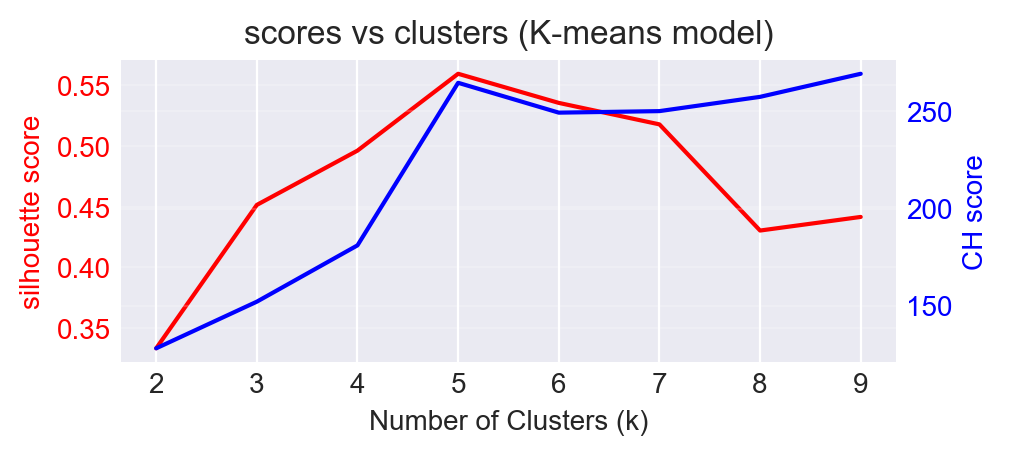

In [11]:
fig,ax=plt.subplots(figsize=(5,2), dpi=200)

# plotting silhouette score
ax.plot(clusters, score_sil, c='red' )
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('silhouette score', c='red')
ax.set_xticks(clusters)
ax.tick_params(axis='y', color='red', labelcolor='red')
ax.yaxis.grid(alpha=0.2)

# plotting CH score on twin axis
ax1=ax.twinx()
ax1.plot(clusters, score_ch, c='blue' )
ax1.set_ylabel('CH score', c='blue')
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.yaxis.grid(alpha=0.2)

plt.title('scores vs clusters (K-means model)')
plt.show()


### **Result from kmeans algorithm:**
### **Cluster sizes of 5 to 7 gives good scores and low inertia as well**

In [12]:
# STORING BEST SCORES AND CORRESPONDING CLUSTER VALUES AND PARAMETERS

best_cluster_sil=int( clusters[np.where(score_sil==score_sil.max() ) ][0] )
print('best cluster size using silhouette score:',best_cluster_sil)

best_cluster_CH=int( clusters[np.where(score_ch==score_ch.max() ) ][0] )
print('best cluster size using CH score:',best_cluster_CH)

df_scores['K-means']=[score_sil.max(), score_ch.max(), best_cluster_sil, best_cluster_CH, params[score_sil==score_sil.max()], params[score_ch==score_ch.max()]]
df_scores

best cluster size using silhouette score: 5
best cluster size using CH score: 9


K-means
Silhouette score                                            0.559485
CH score                                                  269.379807
Best clusters sil                                                  5
Best clusters CH                                                   9
Best Params sil    [{'algorithm': 'lloyd', 'copy_x': True, 'init'...
Best Params ch     [{'algorithm': 'lloyd', 'copy_x': True, 'init'...

# **using DBSCAN**

### silhouette analysis

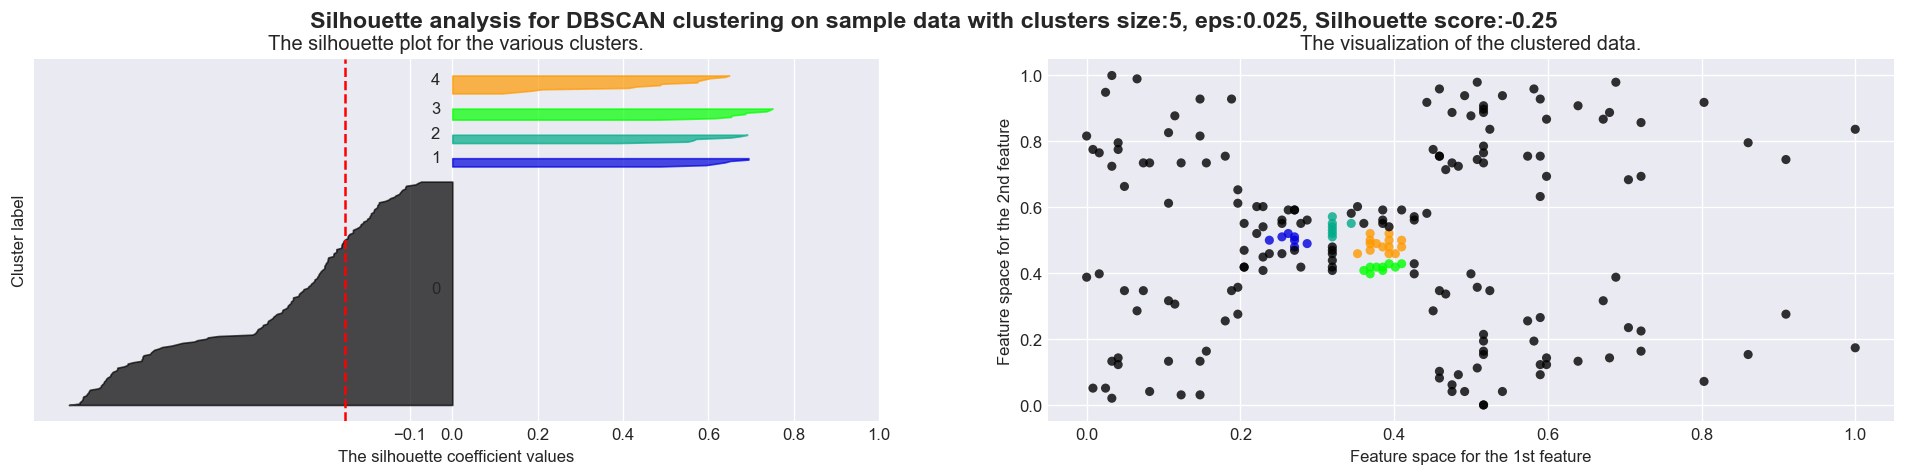

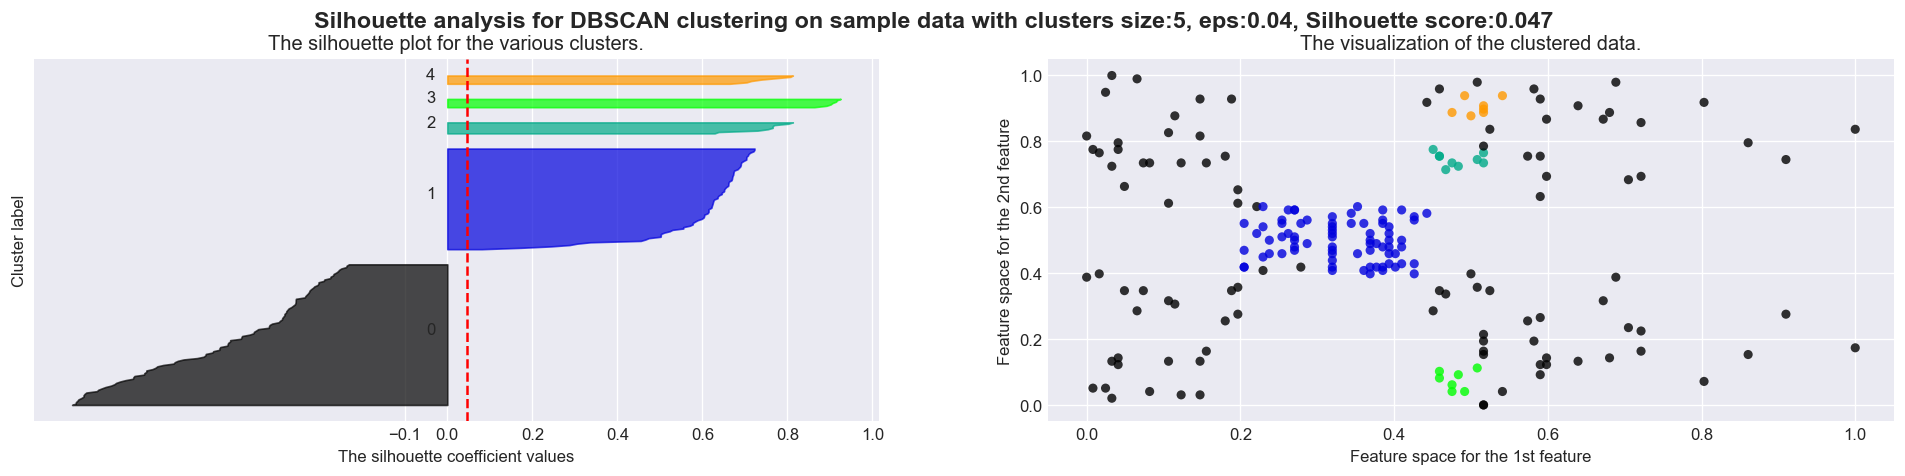

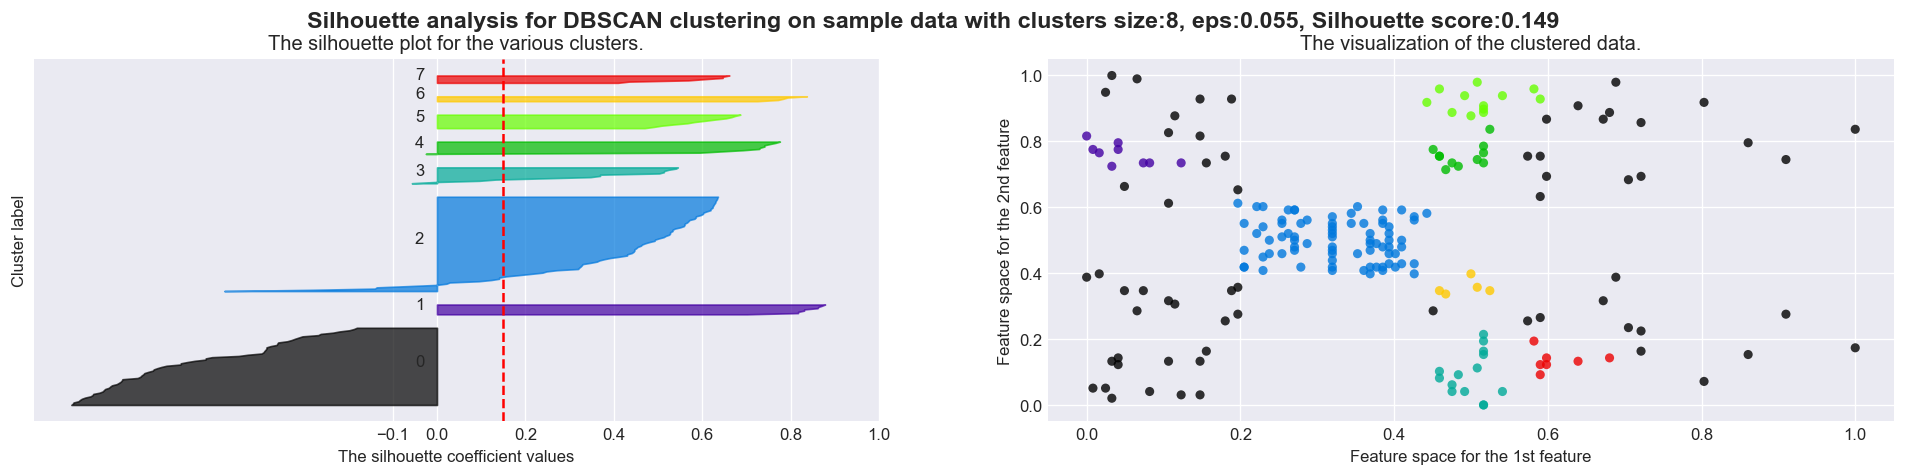

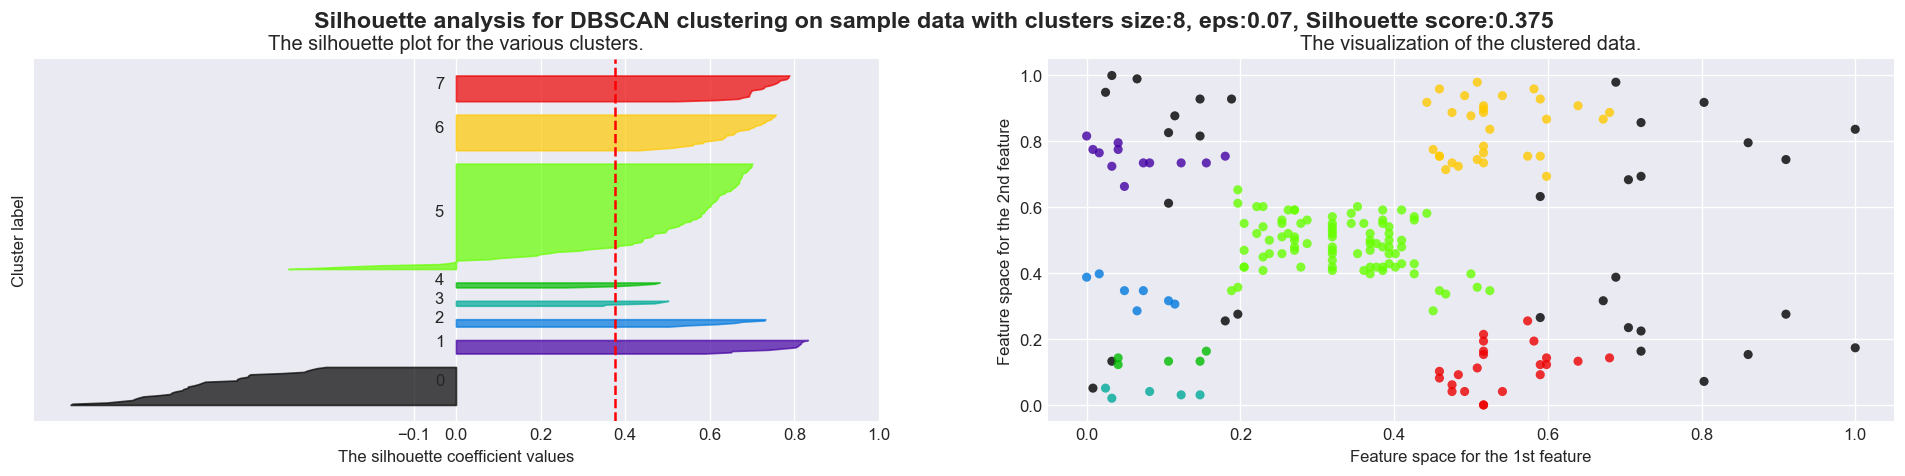

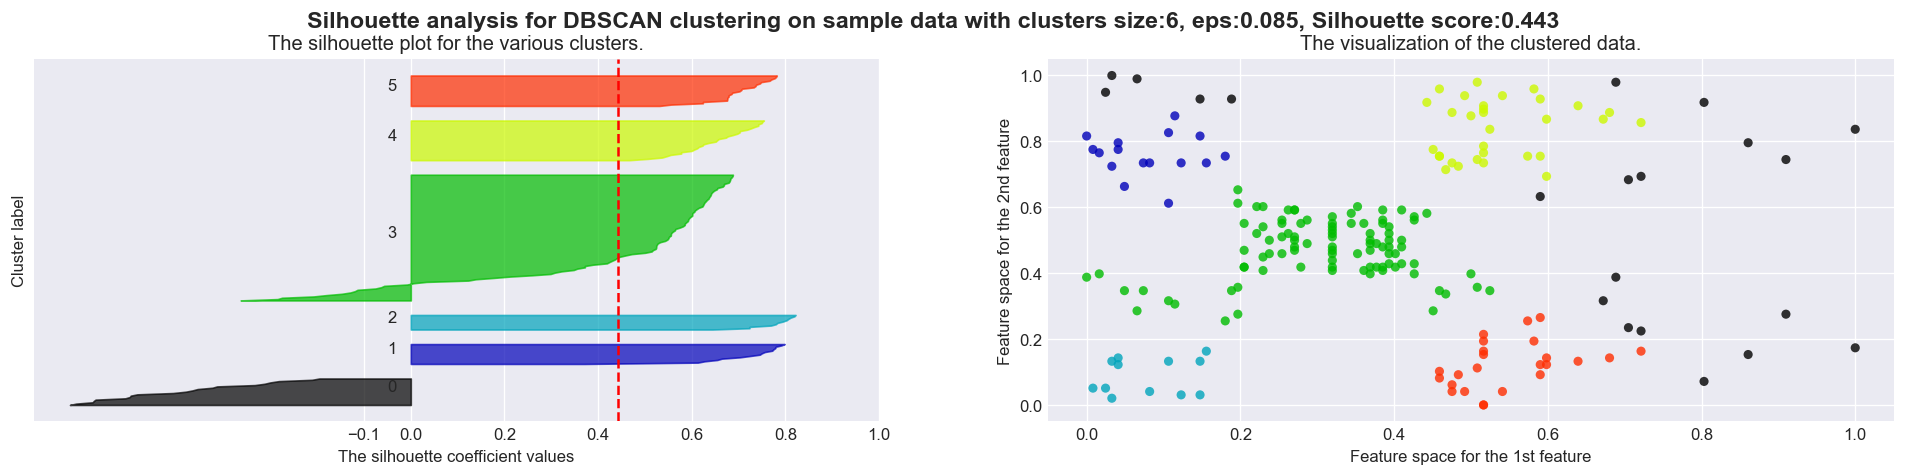

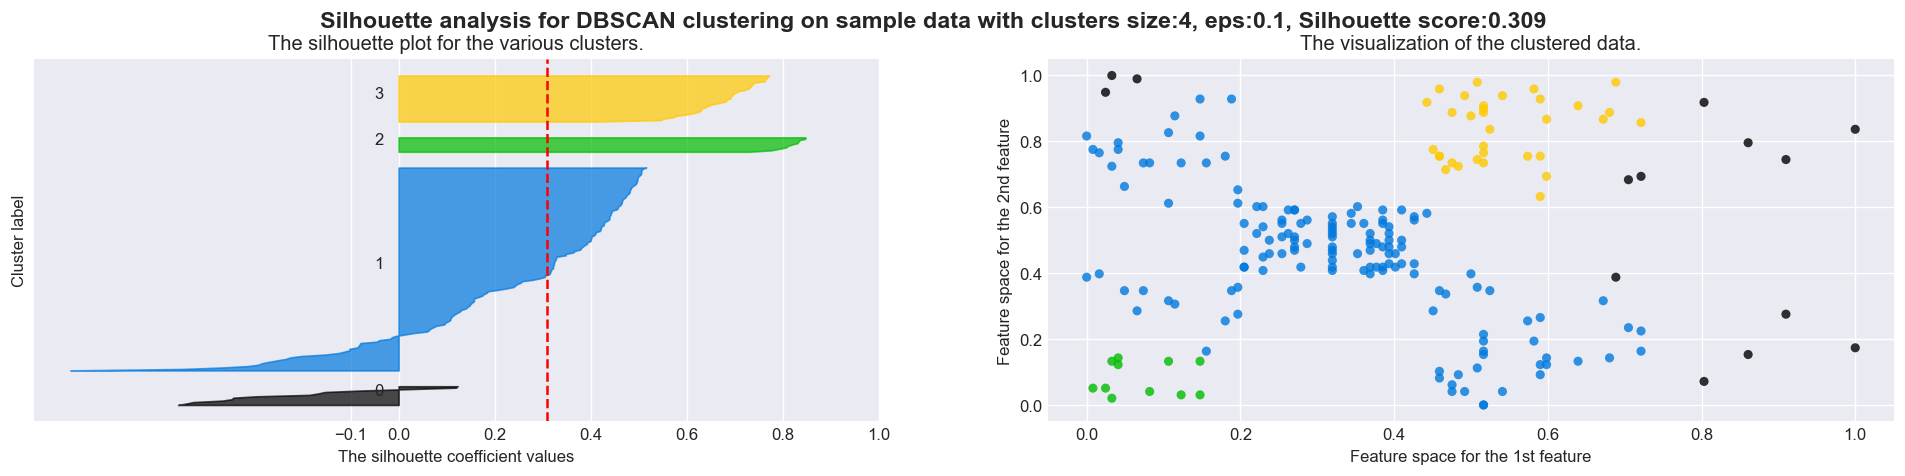

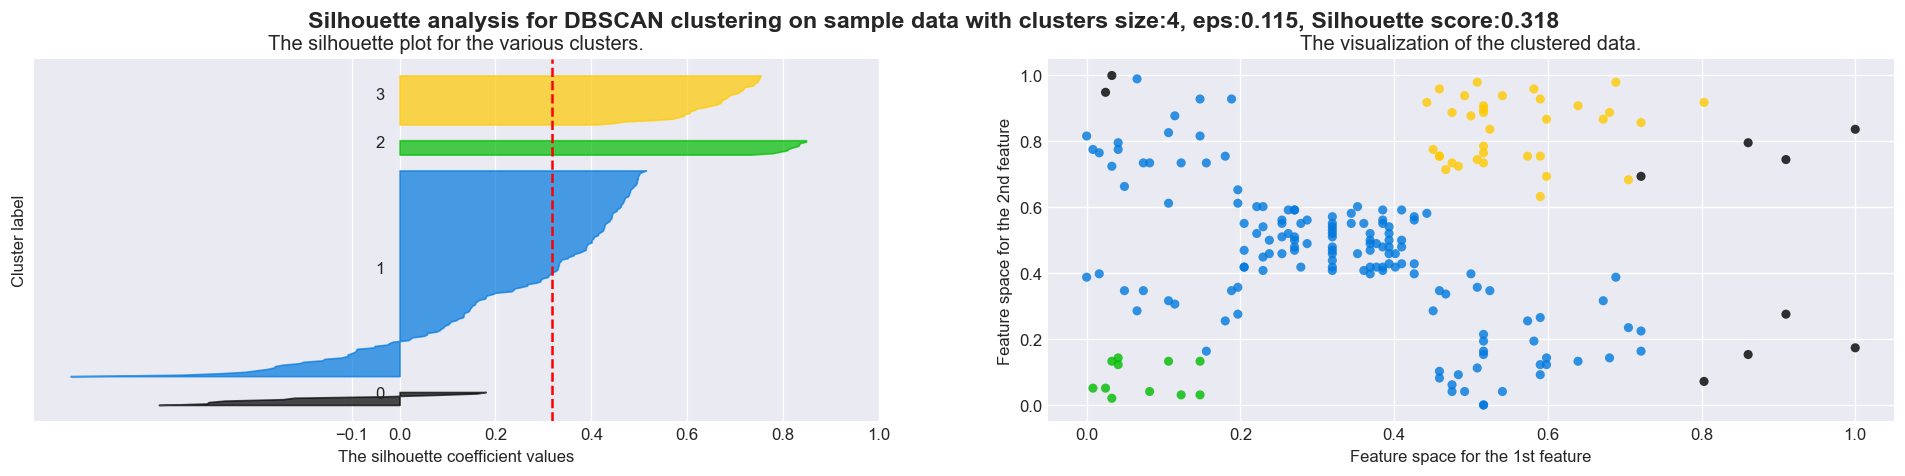

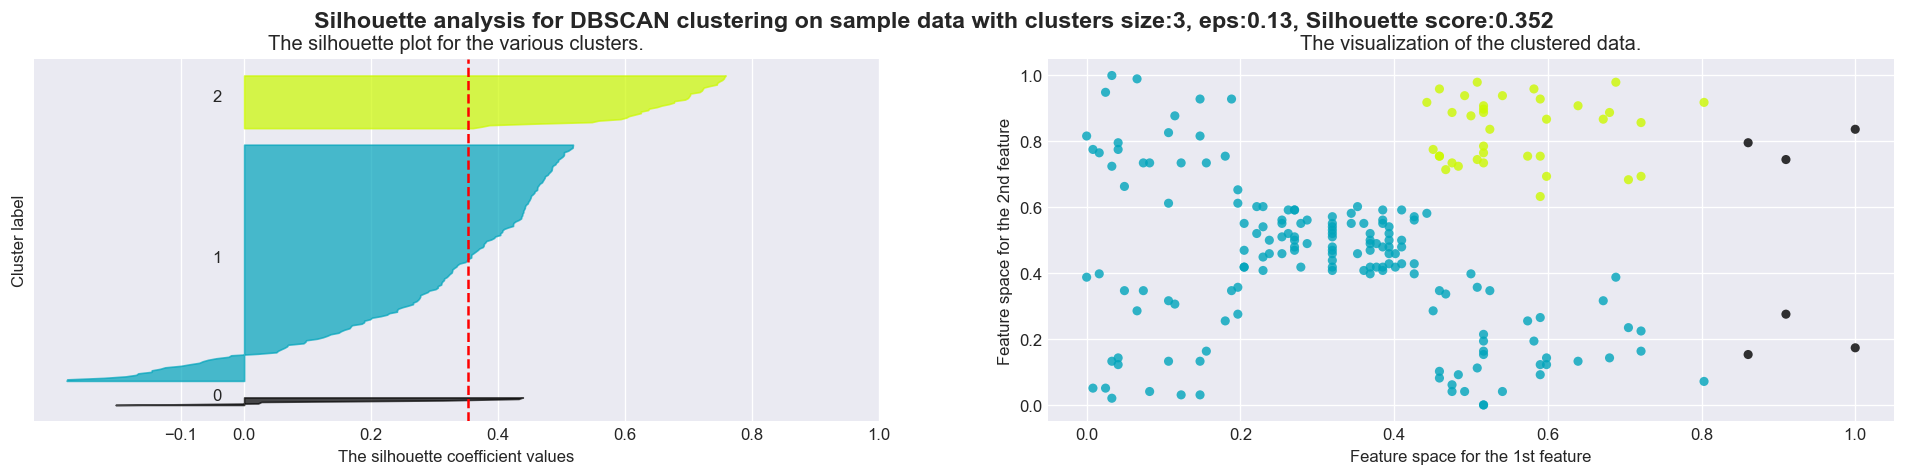

In [13]:
score_sil=np.array([])     # storing scores to plot against cluster sizes and epsilon values
score_ch=np.array([])  

params=np.array([])      # to store parameters of models

silhouette_avg_n_clusters = []    # for plotting purpose

clusters=np.array([])  # to store various cluster sizes corresponding to eps values

eps_array=np.array([])  # store valid epsilon values for dbscan model

eps_range=np.arange(0.01, 0.14, 0.015)
for eps in eps_range: # varying epsilon values in this range
    
    '''MODEL'''
    # initialise and fit model
    model_db=DBSCAN(n_jobs=-1, eps=eps).fit(X)
    # get labels for data points
    labels=model_db.labels_+1
    
    # calculating cluster size
    k=len( np.unique(labels) )
    
    # check if cluster size is greater than 1 
    if k>1:
        
        # storing cluster sizes for various epsilon values 
        eps_array=np.append(eps_array,eps)
        
        # storing cluster sizes for various epsilon values 
        clusters=np.append(clusters,k)
        
        # store parameters for future reference
        params=np.append(params, model_db.get_params() )
    
        '''STORING VARIOUS SCORE VALUES'''    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, labels)

        # avg silhouette score for the clustering
        silhouette_avg=silhouette_score(X,labels)

        # storing silhouette and CH scores for each cluster size in an array 
        score_sil=np.append(score_sil, silhouette_avg)
        score_ch=np.append(score_ch, calinski_harabasz_score(X,labels))


        '''PLOTTING'''
         # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2, dpi=120)
        fig.set_size_inches(20, 4)


        '''FIRST PLOT'''
        # COMPUTING AND PLOTTING SILHOUETTE PLOT FOR EACH CLUSTER
        y_lower = 10
        for i in range(k):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values =  sample_silhouette_values[labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i)/k)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        '''SECOND PLOT '''
        # SHOWING THE ACTUAL CLUSTERS FORMED
        colors = cm.nipy_spectral( labels.astype(float)/k )
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=120, lw=0, alpha=0.8, c=colors, edgecolor='k')

        # SETTING TITLES AND LABELS
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle( (f"Silhouette analysis for DBSCAN clustering on sample data with clusters size:{k}, eps:{ round(eps,3) }, Silhouette score:{ round(silhouette_avg,3) }"),
                     fontsize=14, fontweight='bold')

        plt.show()

### distance(epsilon) vs plotting points : knee point is around 0.04 to 0.1

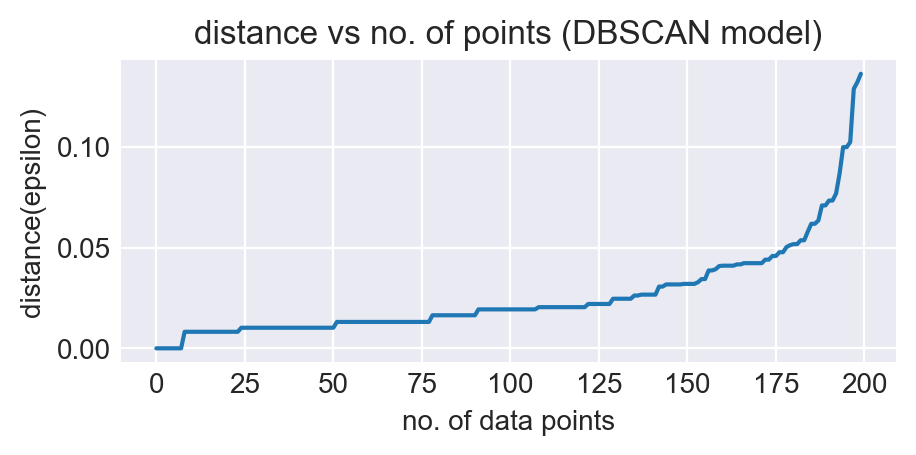

In [14]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(5,2), dpi=200)
plt.plot(distances)

plt.xlabel('no. of data points')
plt.ylabel('distance(epsilon)')
plt.title('distance vs no. of points (DBSCAN model)')
plt.show()

### plotting scores for various eps values

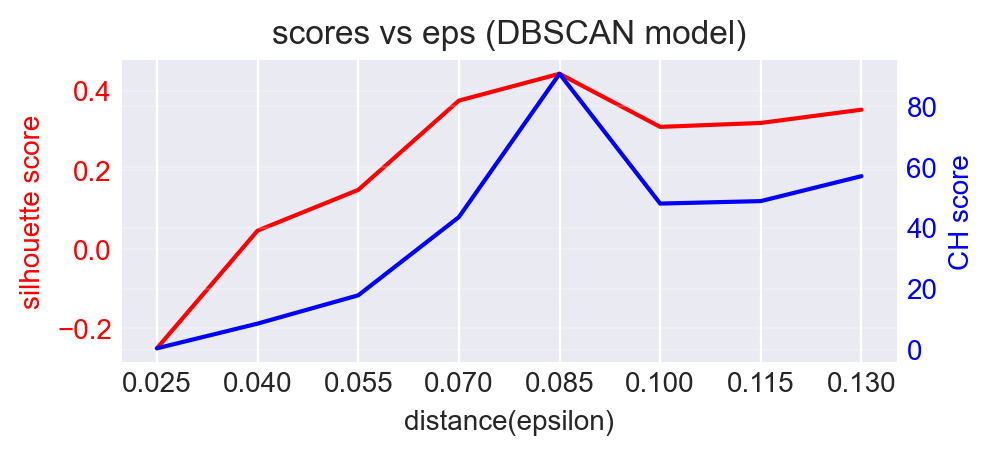

In [15]:
fig, ax= plt.subplots(figsize=(5,2), dpi=200)

# plotting silhouette score
ax.plot(eps_array, score_sil, c='red' )
ax.set_xlabel('distance(epsilon)')
ax.set_ylabel('silhouette score', c='red')
ax.tick_params(axis='y', color='red', labelcolor='red')
ax.set_xticks(eps_range)
ax.yaxis.grid(alpha=0.2)

# plotting CH score on twin axis
ax1=ax.twinx()
ax1.plot(eps_array, score_ch, c='blue' )
ax1.set_ylabel('CH score', c='blue')
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.yaxis.grid(alpha=0.2)

plt.title('scores vs eps (DBSCAN model)')
plt.show()


### **Result from DBSCAN algorithm:**
### **As evident from silhouette plot, dbscan seems to be mislabelling a lot as compared to kmeans**
### **eps of 0.09 gives good scores and cluster size of 6**

In [16]:
# STORING BEST SCORES AND CORRESPONDING CLUSTER VALUES AND PARAMETERS

best_eps_sil=round( eps_array[np.where(score_sil==score_sil.max() ) ][0], 3)
best_cluster_sil=int( clusters[np.where(score_sil==score_sil.max() ) ][0] )
print('best cluster size and eps using silhouette score:\n', (best_cluster_sil, best_eps_sil) )

best_eps_CH=round( eps_array[np.where(score_ch==score_ch.max() ) ][0], 3)
best_cluster_CH=int( clusters[np.where(score_ch==score_ch.max() ) ][0] )
print('best cluster size and eps using CH score:\n', (best_cluster_CH, best_eps_CH) )

df_scores['dbscan']=[score_sil.max(), score_ch.max(), best_cluster_sil, best_cluster_CH, params[score_sil==score_sil.max()], params[score_ch==score_ch.max()]]
df_scores

best cluster size and eps using silhouette score:
 (6, 0.085)
best cluster size and eps using CH score:
 (6, 0.085)


K-means  \
Silhouette score                                            0.559485   
CH score                                                  269.379807   
Best clusters sil                                                  5   
Best clusters CH                                                   9   
Best Params sil    [{'algorithm': 'lloyd', 'copy_x': True, 'init'...   
Best Params ch     [{'algorithm': 'lloyd', 'copy_x': True, 'init'...   

                                                              dbscan  
Silhouette score                                            0.442659  
CH score                                                   90.631977  
Best clusters sil                                                  6  
Best clusters CH                                                   6  
Best Params sil    [{'algorithm': 'auto', 'eps': 0.085, 'leaf_siz...  
Best Params ch     [{'algorithm': 'auto', 'eps': 0.085, 'leaf_siz...

# **using Agglomerative clustering**

## *Agglomerative using Dendrogram method(distance threshold based)*

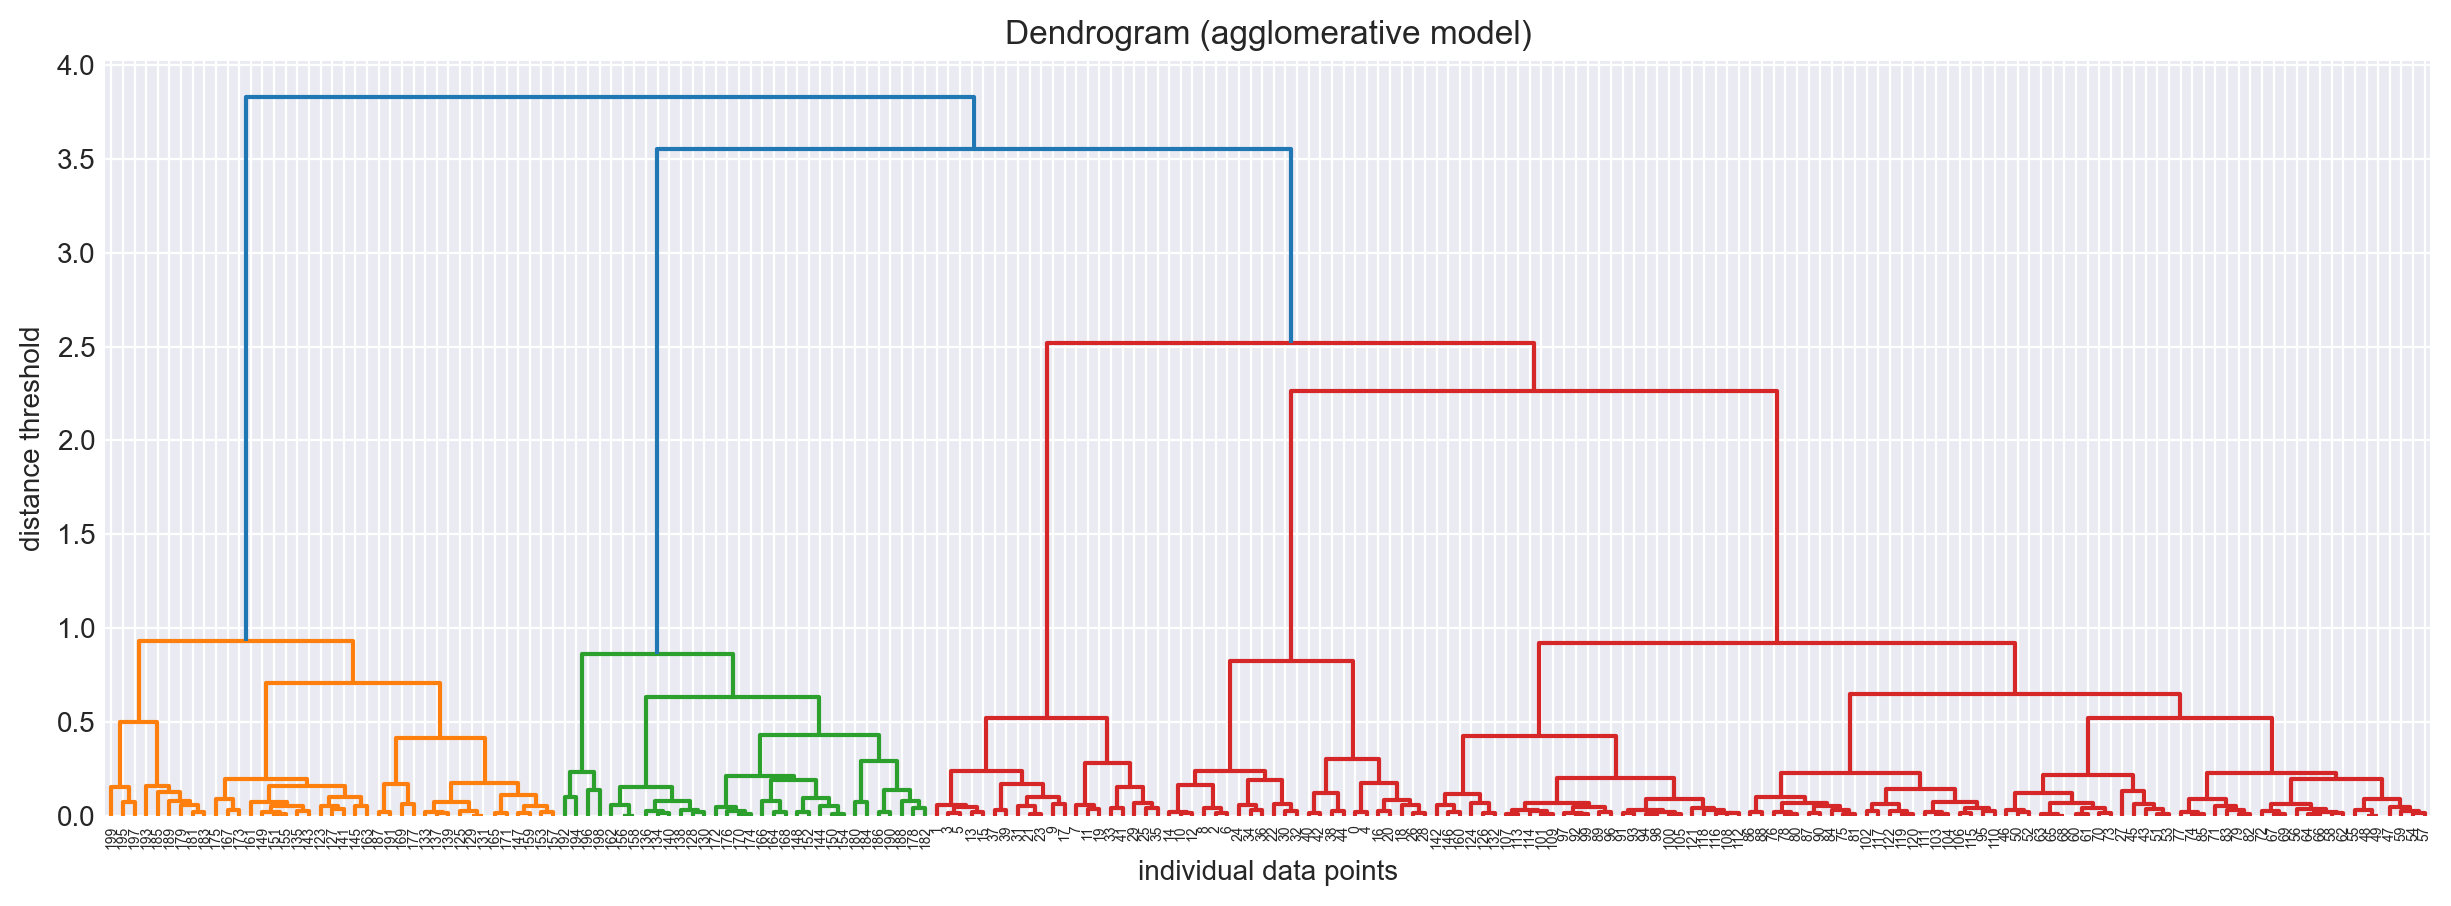

In [17]:
plt.figure(figsize=(15,5), dpi=200)
dend=hierarchy.dendrogram( hierarchy.linkage(X, method='ward') )
plt.title('Dendrogram (agglomerative model)')
plt.xlabel('individual data points')
plt.ylabel('distance threshold')
plt.show()

### silhouette analysis

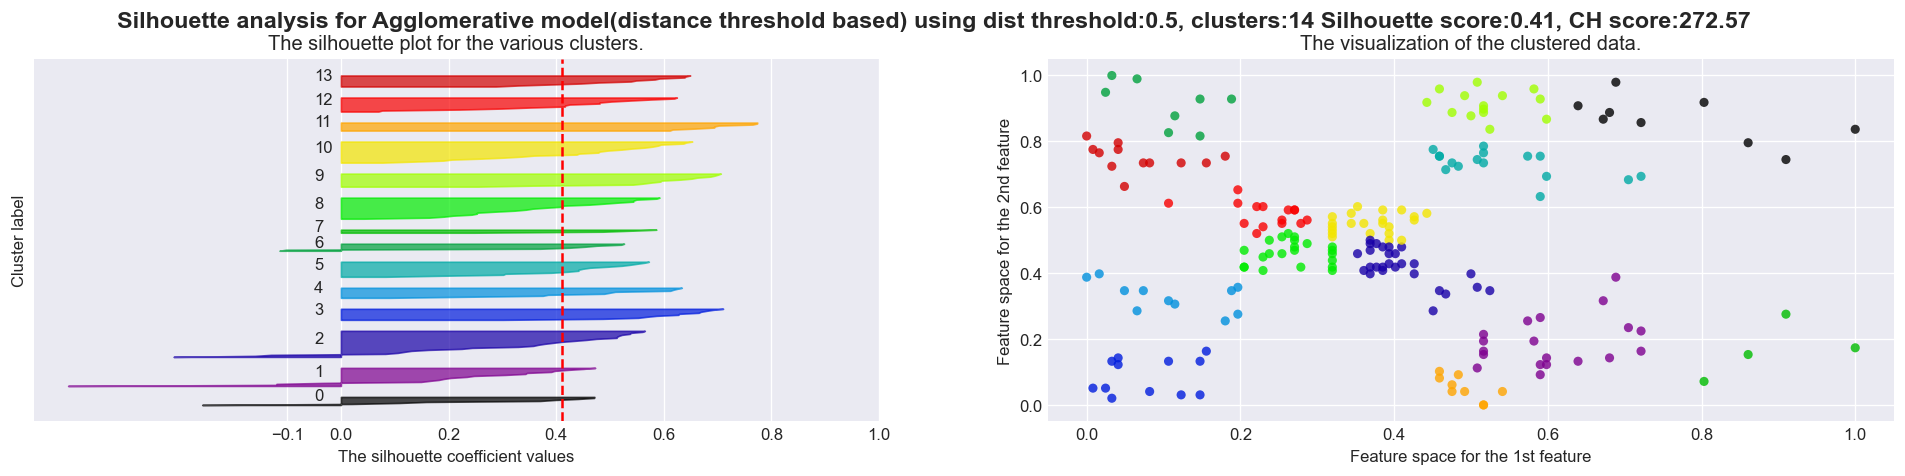

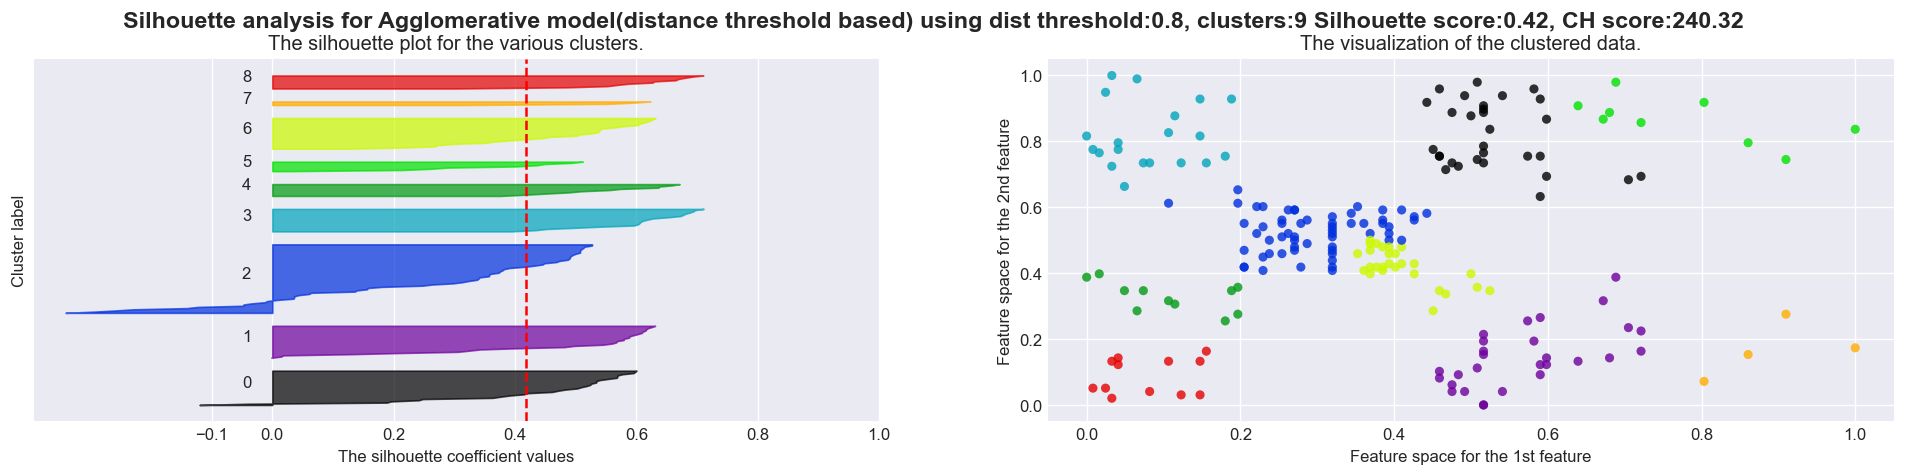

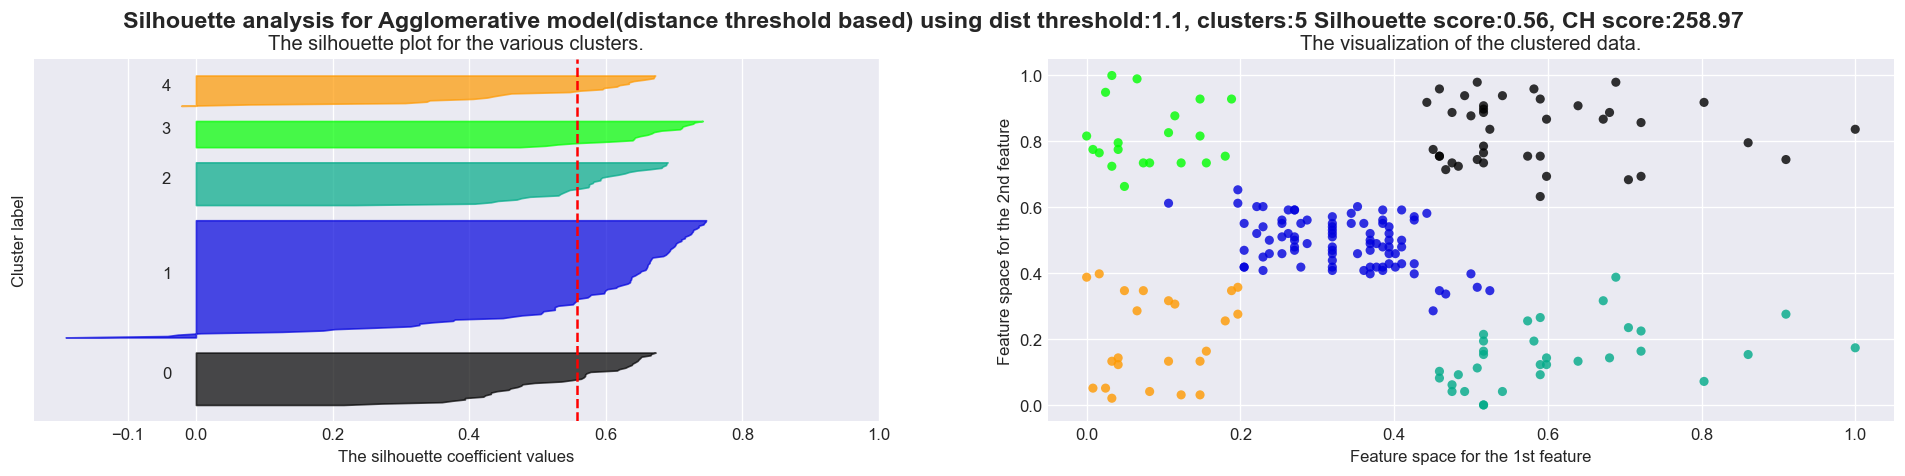

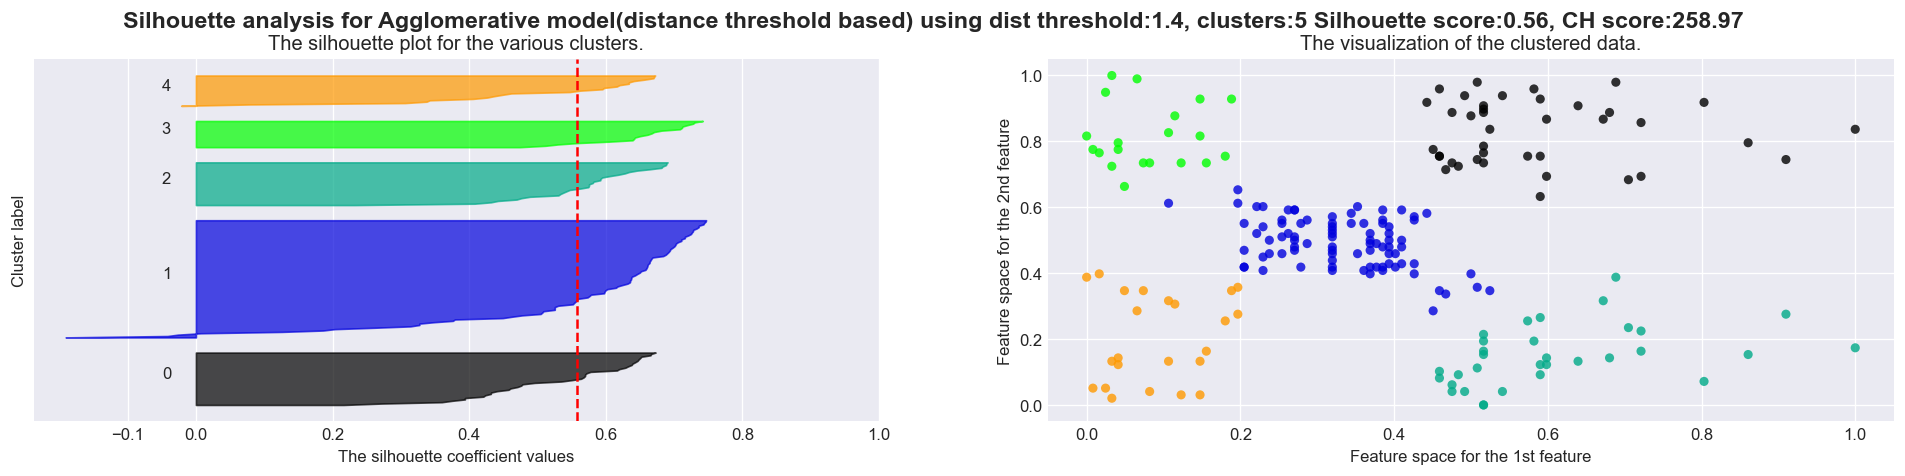

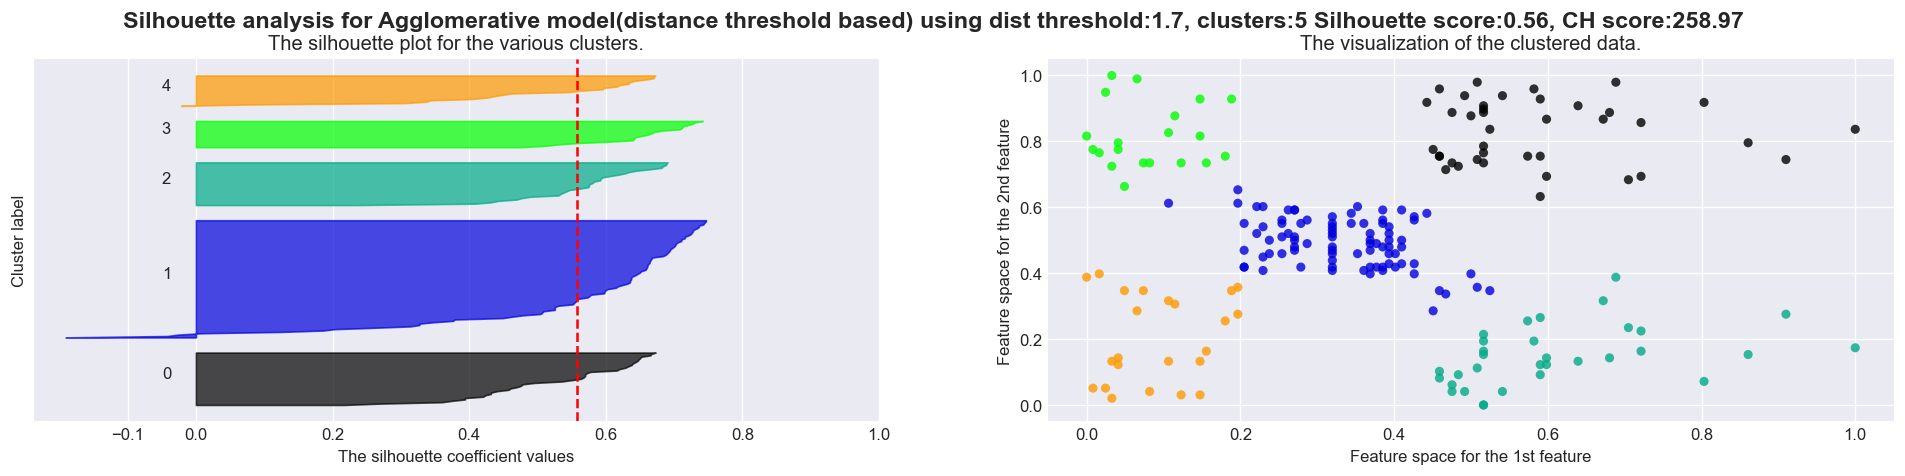

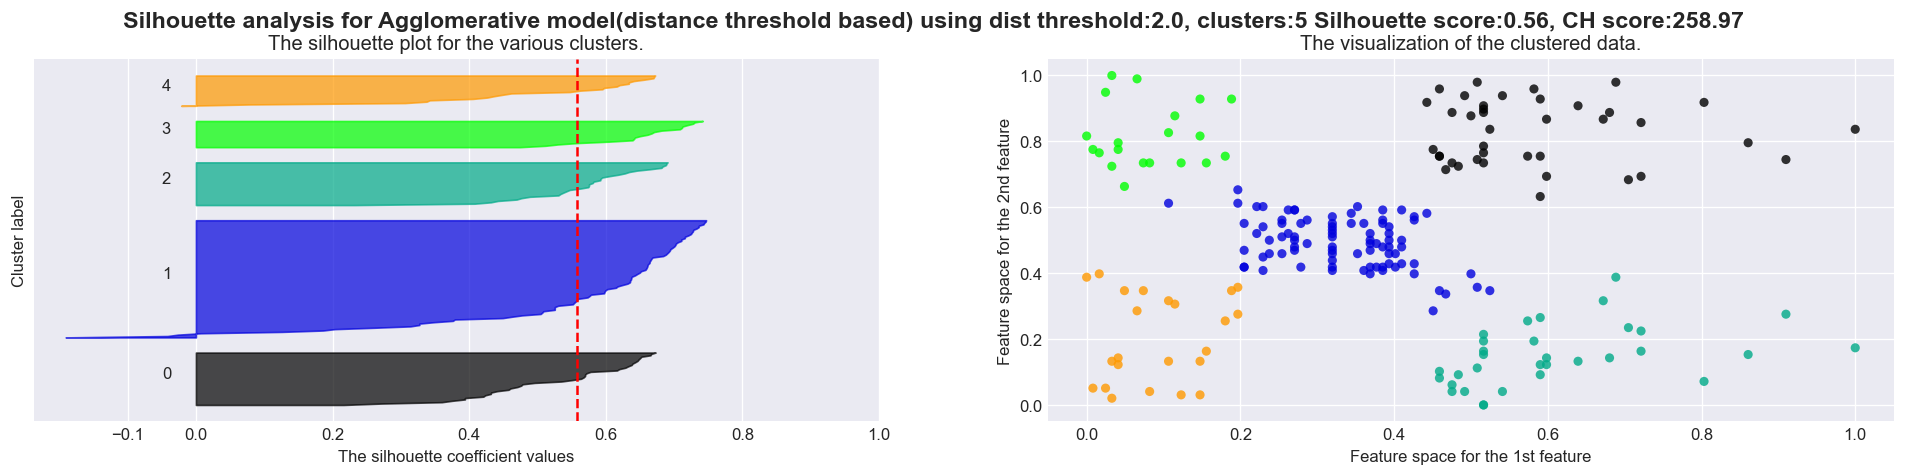

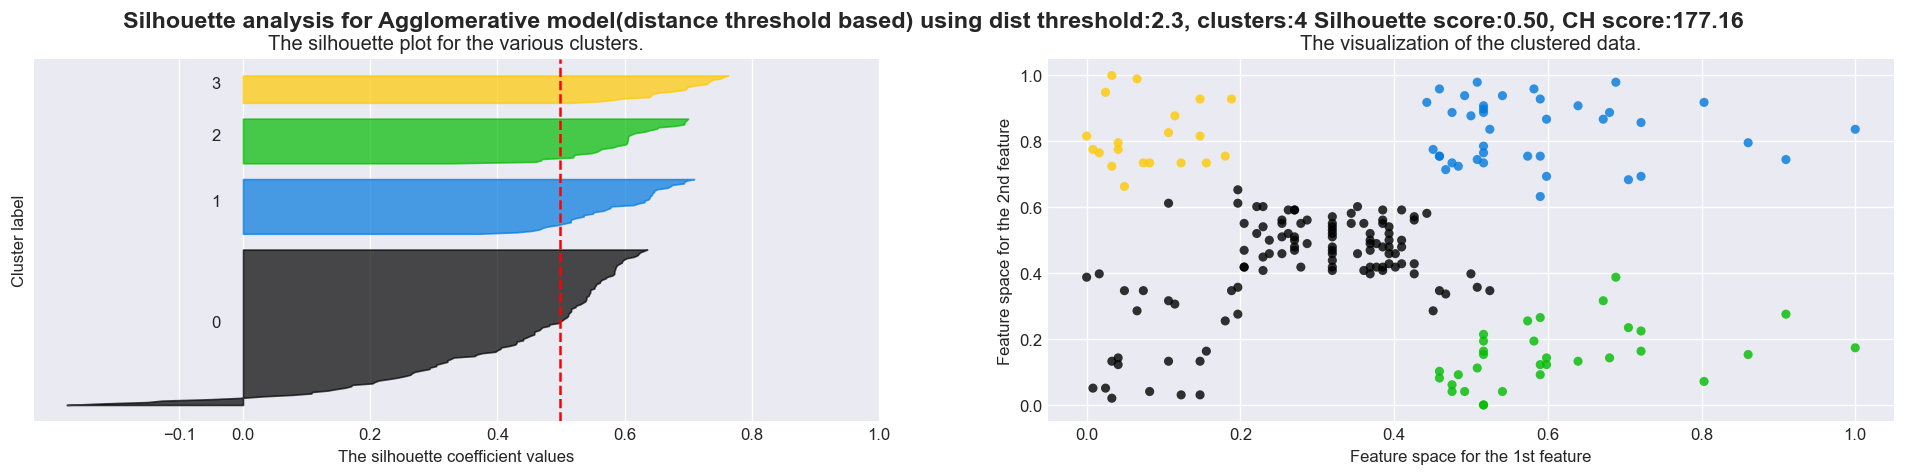

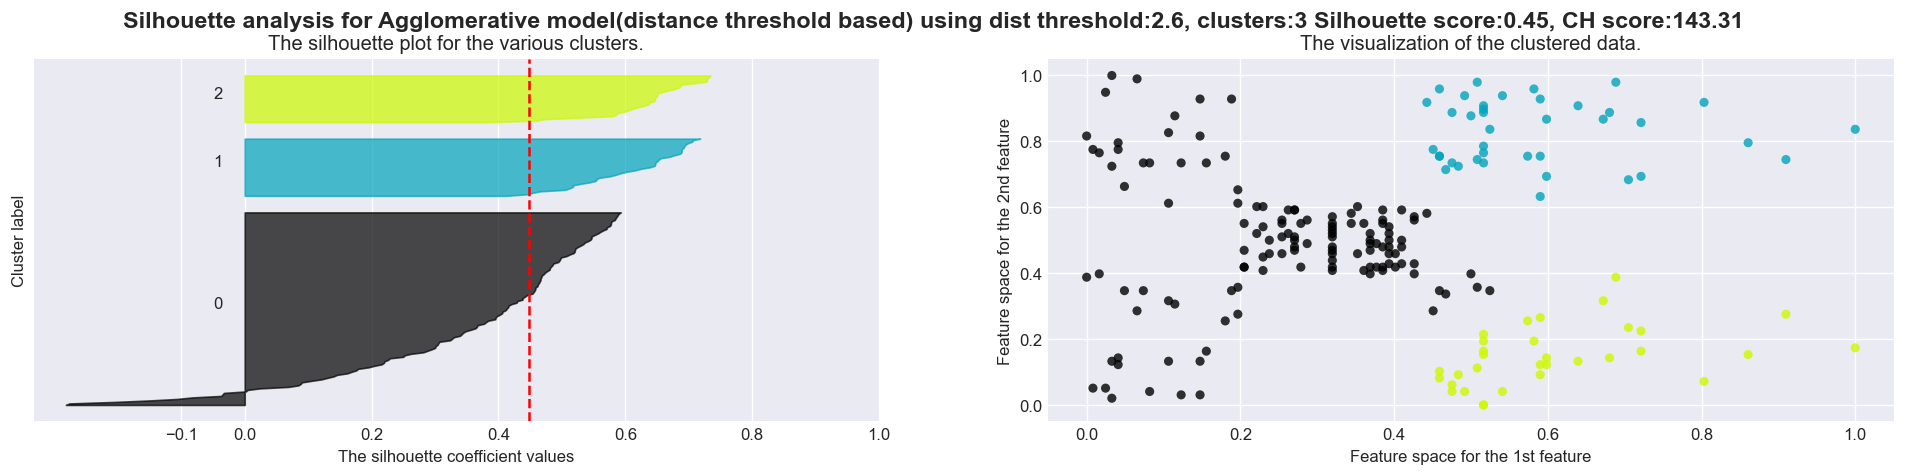

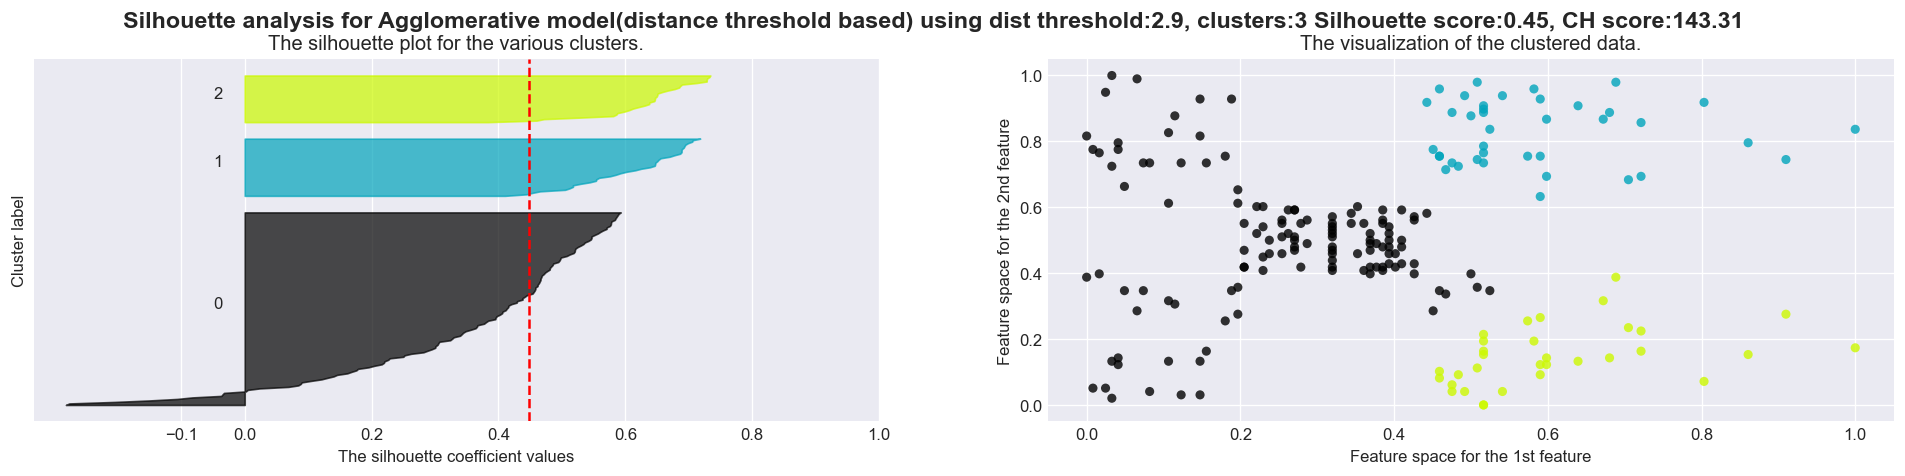

In [18]:
#  storing scores to plot against cluster size and distance threshold
score_sil=np.array([]) 
score_ch=np.array([])  

params=np.array([])      # to store parameters of models

silhouette_avg_n_clusters = []    # for plotting purpose

clusters=np.array([])  # to store various cluster sizes corresponding to eps values

distance_threshold=np.array([]) # to store valid distance threshold values

dist_thresh_range=np.arange(0.5,3,0.3)
for dist in dist_thresh_range: # varying distance threshold values in this range
    
    '''MODEL'''
    # initialise and fit model
    model_agg= AgglomerativeClustering( n_clusters=None, distance_threshold=dist).fit(X)
    # get labels for data points
    labels=model_agg.labels_
    
    # calculating cluster size
    k=len( np.unique(labels) )
    
    # check if cluster size is greater than 1 
    if k>1:
        
        # store distance threshold
        distance_threshold=np.append(distance_threshold,dist)
        
        # store parameters for future reference
        params=np.append(params, model_agg.get_params() )
    
        '''STORING VARIOUS SCORE VALUES'''    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, labels)

        # avg silhouette score for the clustering
        silhouette_avg=silhouette_score(X,labels)

        # storing silhouette and CH scores for each cluster size in an array 
        score_sil=np.append(score_sil, silhouette_avg)
        score_ch=np.append(score_ch, calinski_harabasz_score(X,labels))

        # storing cluster sizes for various distance threshold values values 
        clusters=np.append(clusters,k)

        '''PLOTTING'''
         # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2, dpi=120)
        fig.set_size_inches(20, 4)


        '''FIRST PLOT'''
        # COMPUTING AND PLOTTING SILHOUETTE PLOT FOR EACH CLUSTER
        y_lower = 10
        for i in range(k):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values =  sample_silhouette_values[labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i)/k)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        '''SECOND PLOT '''
        # SHOWING THE ACTUAL CLUSTERS FORMED
        colors = cm.nipy_spectral( labels.astype(float)/k )
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=120, lw=0, alpha=0.8, c=colors, edgecolor='k')

        # SETTING TITLES AND LABELS
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle( (f"Silhouette analysis for Agglomerative model(distance threshold based) using dist threshold:{round(dist,3)}, clusters:{k} Silhouette score:{silhouette_score(X,labels):.2f}, CH score:{calinski_harabasz_score(X,labels):.2f}"),
                     fontsize=14, fontweight='bold')
        
        plt.show()

### plotting scores for various dist threshold values

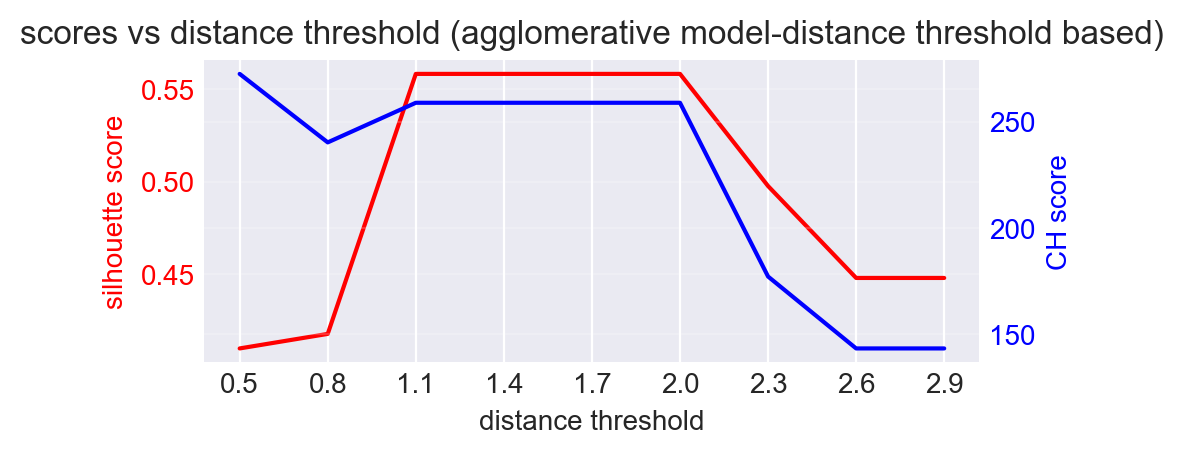

In [19]:
fig, ax= plt.subplots(figsize=(5,2), dpi=200)

# plotting distance threshold vs scores
ax.set_xlabel('distance threshold')

# plotting silhouette score
ax.plot(distance_threshold, score_sil, c='red' )
ax.set_ylabel('silhouette score', c='red')
ax.tick_params(axis='y', color='red', labelcolor='red')
ax.set_xticks(dist_thresh_range)
ax.yaxis.grid(alpha=0.2)

# plotting CH score on twin axis
ax1=ax.twinx()
ax1.plot(distance_threshold, score_ch, c='blue' )
ax1.set_ylabel('CH score', c='blue')
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.yaxis.grid(alpha=0.2)

plt.title('scores vs distance threshold (agglomerative model-distance threshold based)')
plt.show()

### plotting cluster size vs scores

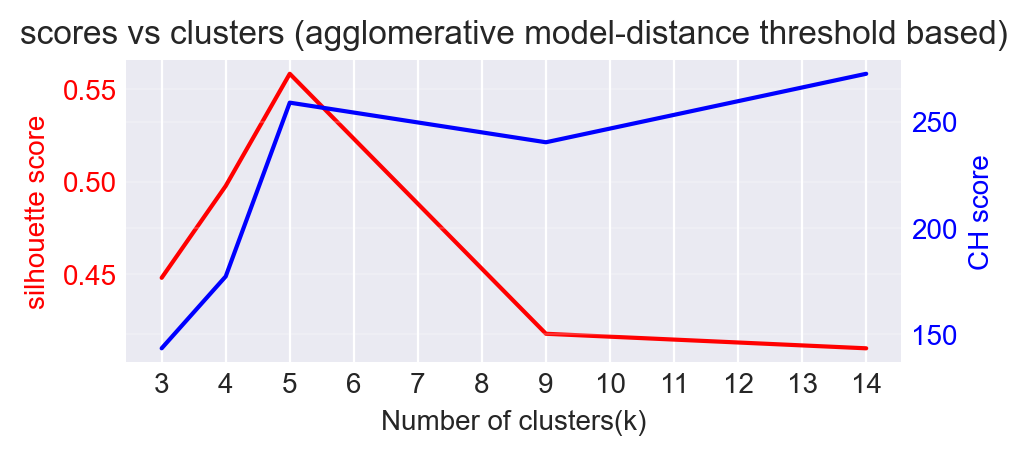

In [20]:
fig, ax= plt.subplots(figsize=(5,2), dpi=200)

# plotting silhouette score
ax.plot(clusters, score_sil, c='red' )
ax.set_xlabel('Number of clusters(k)')
ax.set_xticks(np.arange(0,21))
ax.set_ylabel('silhouette score', c='red')
ax.tick_params(axis='y', color='red', labelcolor='red')
ax.yaxis.grid(alpha=0.2)

# plotting CH score on twin axis
ax1=ax.twinx()
ax1.plot(clusters, score_ch, c='blue' )
ax1.set_ylabel('CH score', c='blue')
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.yaxis.grid(alpha=0.2)

plt.title('scores vs clusters (agglomerative model-distance threshold based)')
plt.show()

### **Result from agglomerative algorithm using dendrogram:** 
### **distance threshold of (1:2.25) gives good scores, cluster size of 5 also gives best scores**

In [21]:
# STORING BEST SCORES AND CORRESPONDING CLUSTER VALUES AND PARAMETERS

best_cluster_sil=int( clusters[np.where(score_sil==score_sil.max() ) ][0] )
best_dist_sil=round( distance_threshold[np.where(score_sil==score_sil.max() ) ][0], 3)
print('best cluster size and distance threshold using silhouette score:\n', (best_cluster_sil, best_dist_sil) )

best_cluster_CH=int( clusters[np.where(score_ch==score_ch.max() ) ][0] )
best_dist_CH=round( distance_threshold[np.where(score_ch==score_ch.max() ) ][0], 3)
print('best cluster size and distance theshold using CH score:\n', (best_cluster_CH, best_dist_CH) )

df_scores['agg_dist_based']=[score_sil.max(), score_ch.max(), best_cluster_sil, best_cluster_CH, params[score_sil==score_sil.max()], params[score_ch==score_ch.max()]]
df_scores

best cluster size and distance threshold using silhouette score:
 (5, 1.1)
best cluster size and distance theshold using CH score:
 (14, 0.5)


K-means  \
Silhouette score                                            0.559485   
CH score                                                  269.379807   
Best clusters sil                                                  5   
Best clusters CH                                                   9   
Best Params sil    [{'algorithm': 'lloyd', 'copy_x': True, 'init'...   
Best Params ch     [{'algorithm': 'lloyd', 'copy_x': True, 'init'...   

                                                              dbscan  \
Silhouette score                                            0.442659   
CH score                                                   90.631977   
Best clusters sil                                                  6   
Best clusters CH                                                   6   
Best Params sil    [{'algorithm': 'auto', 'eps': 0.085, 'leaf_siz...   
Best Params ch     [{'algorithm': 'auto', 'eps': 0.085, 'leaf_siz...   

                                                      agg_dist_based  
Silhouette score                                             0.55827  
CH score                                                  272.571303  
Best clusters sil                                                  5  
Best clusters CH                                                  14  
Best Params sil    [{'affinity': 'euclidean', 'compute_distances'...  
Best Params ch     [{'affinity': 'euclidean', 'compute_distances'...

## *Agglomerative based directly on clusters*

### silhouette analysis

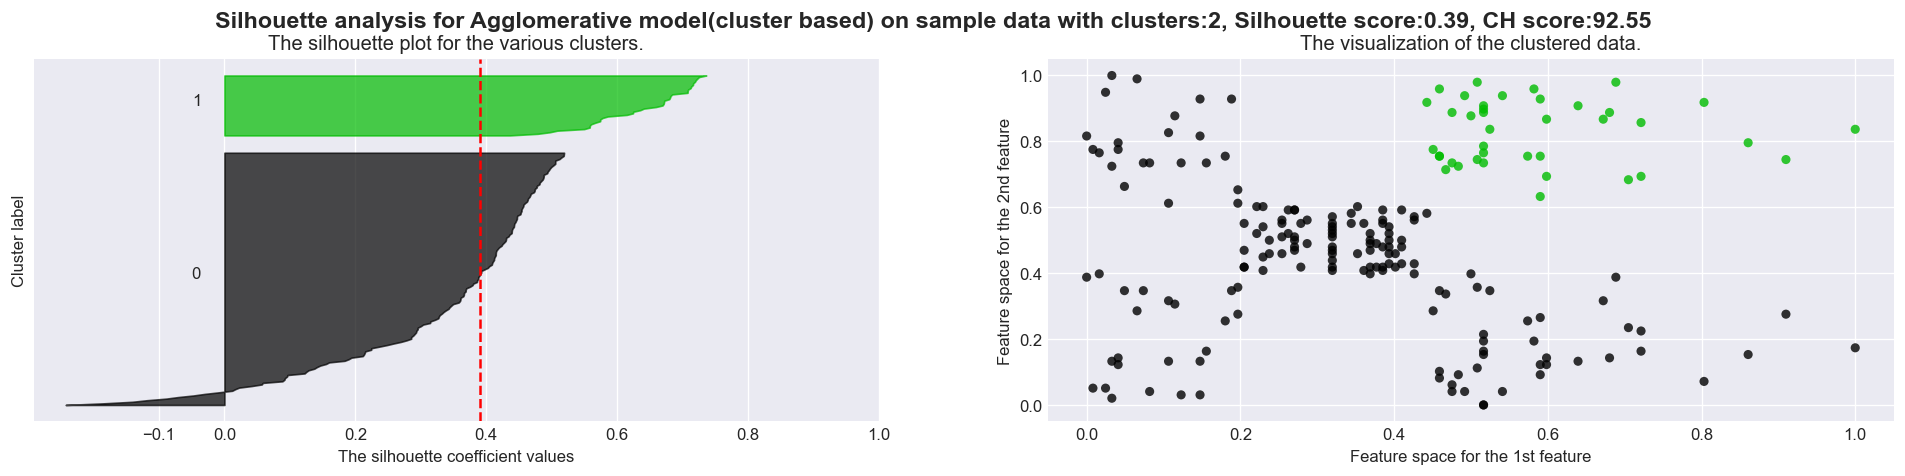

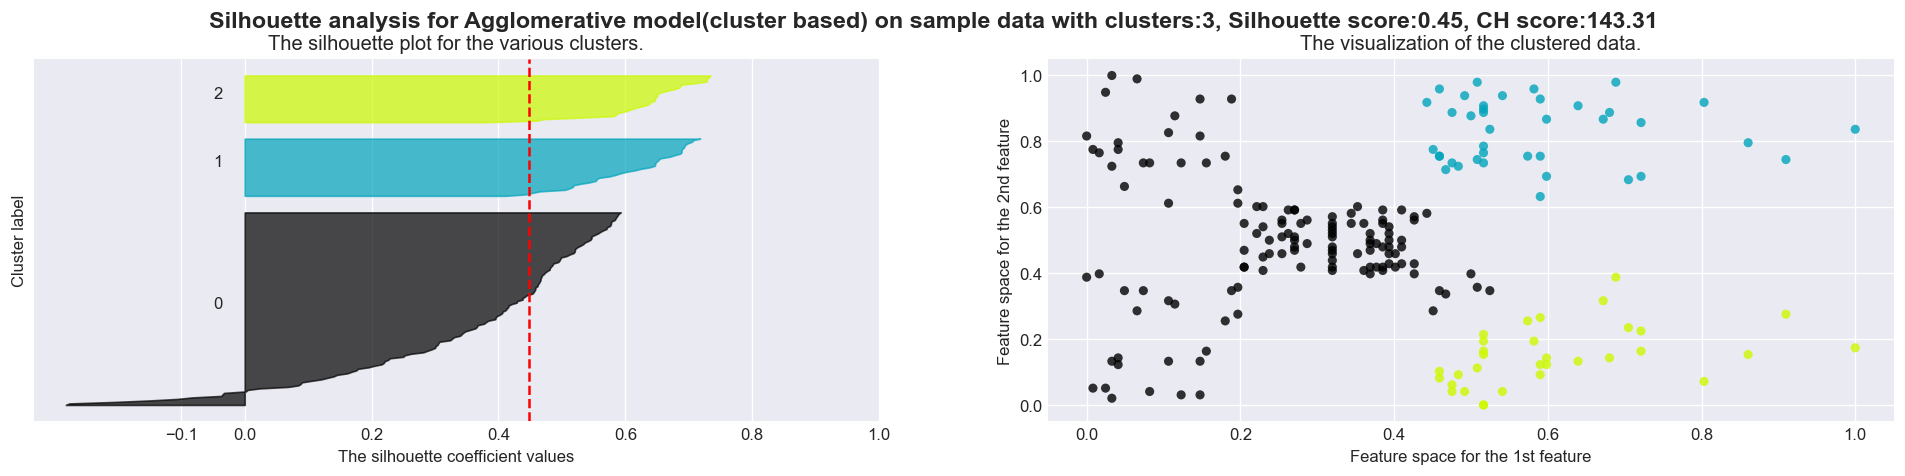

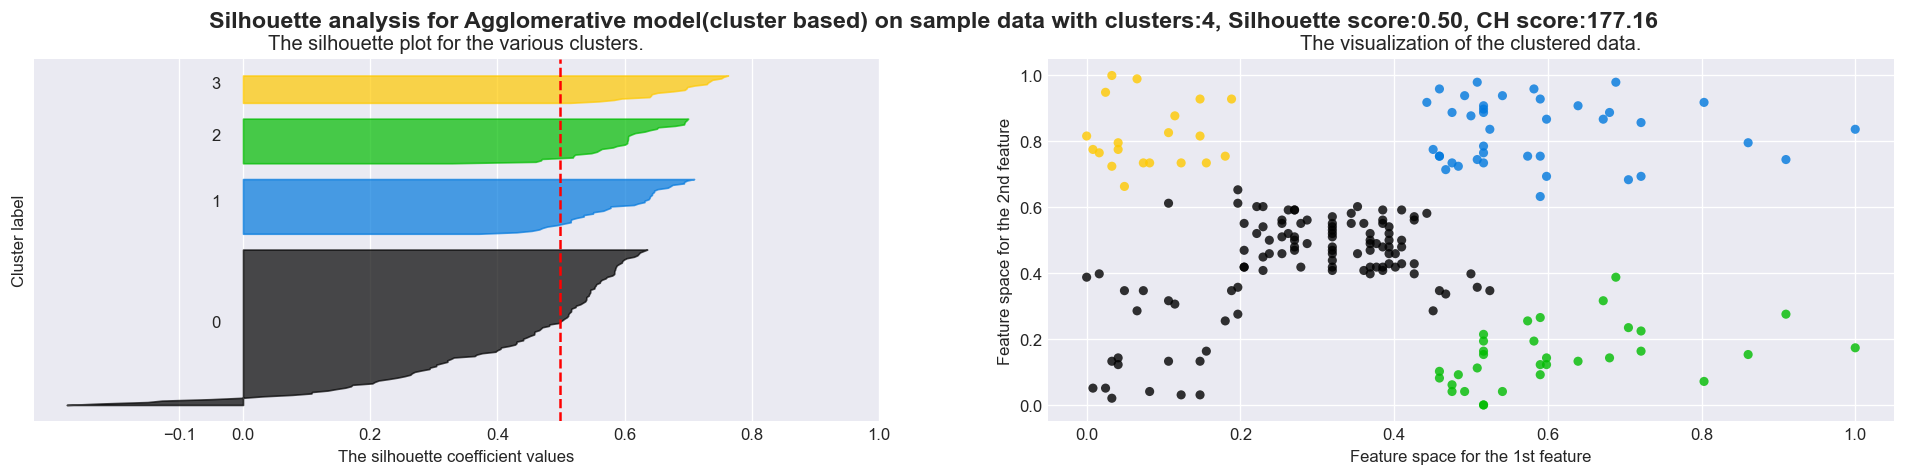

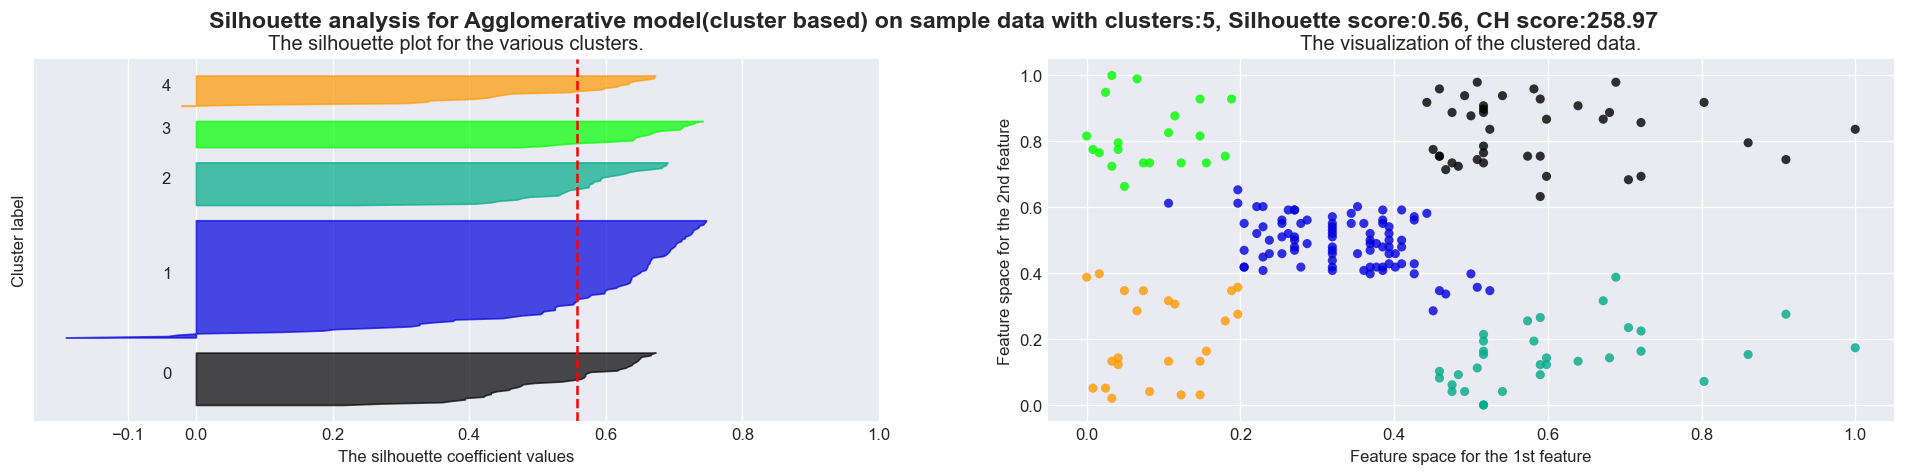

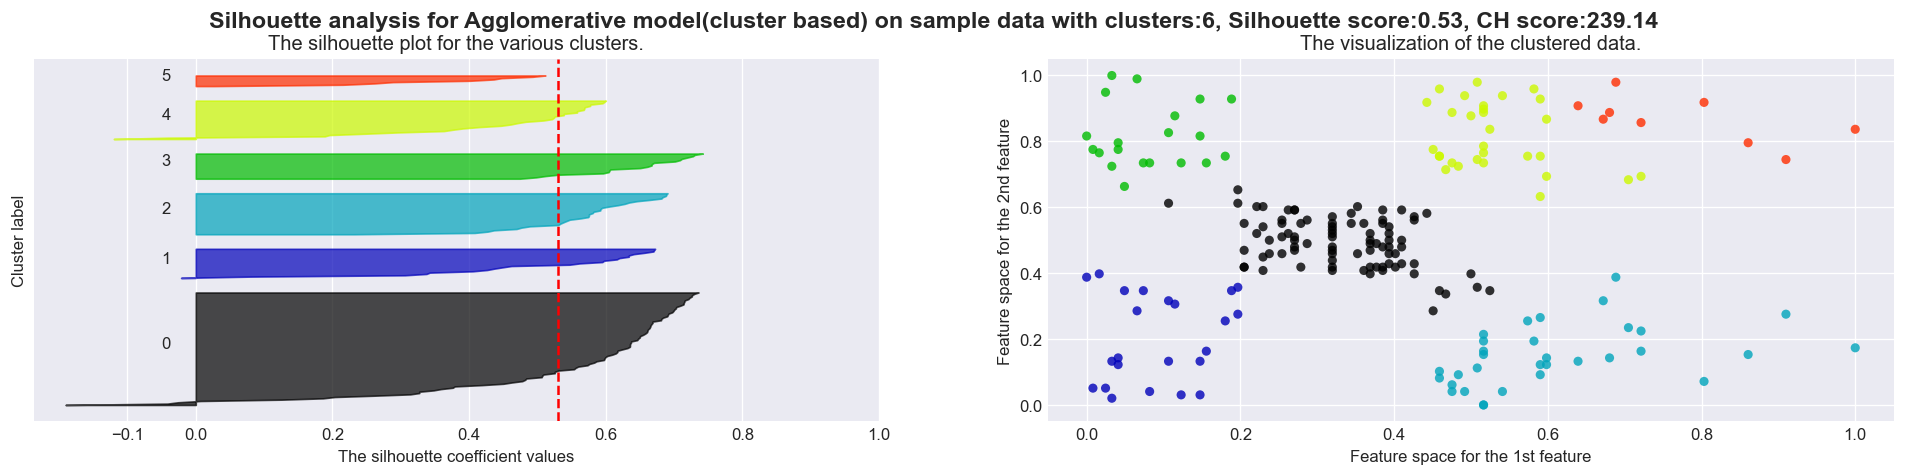

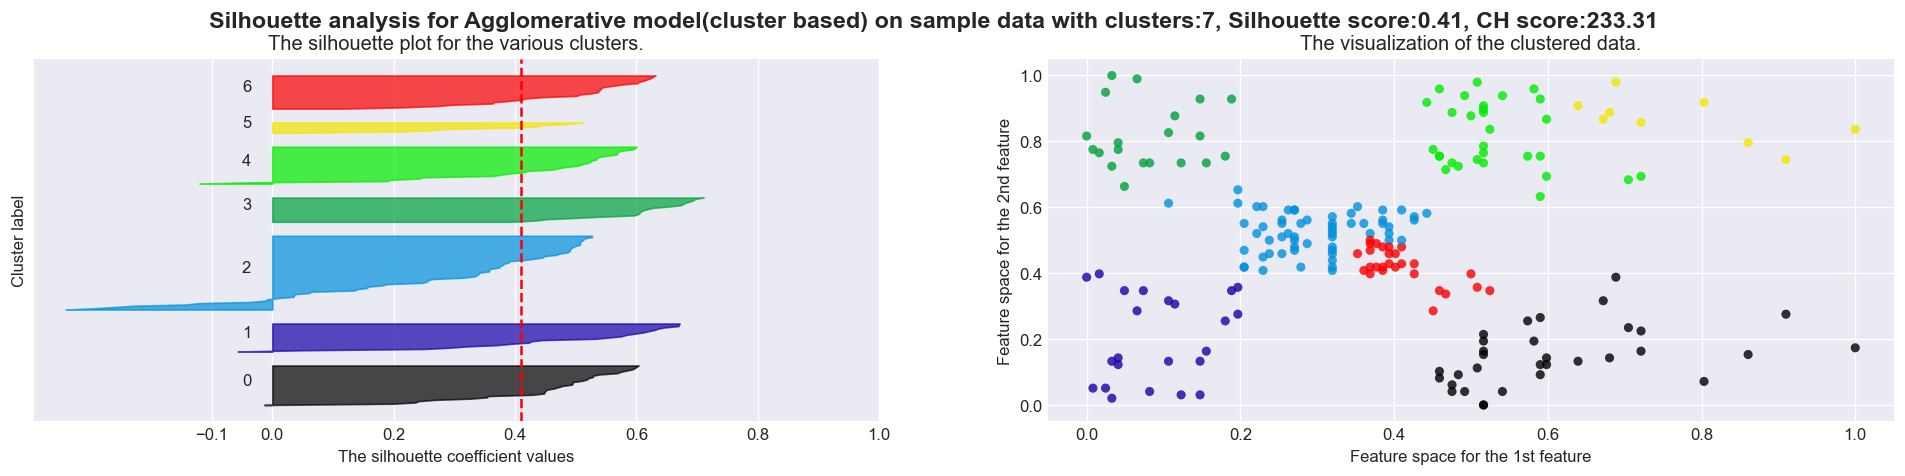

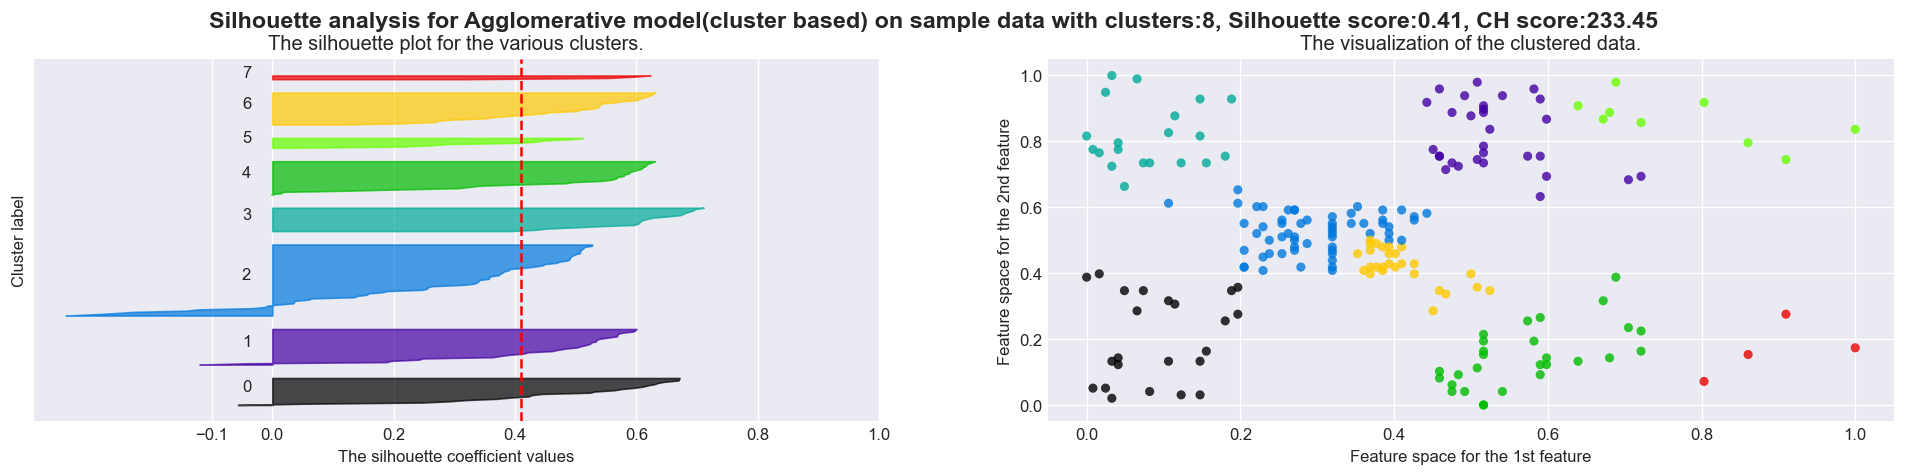

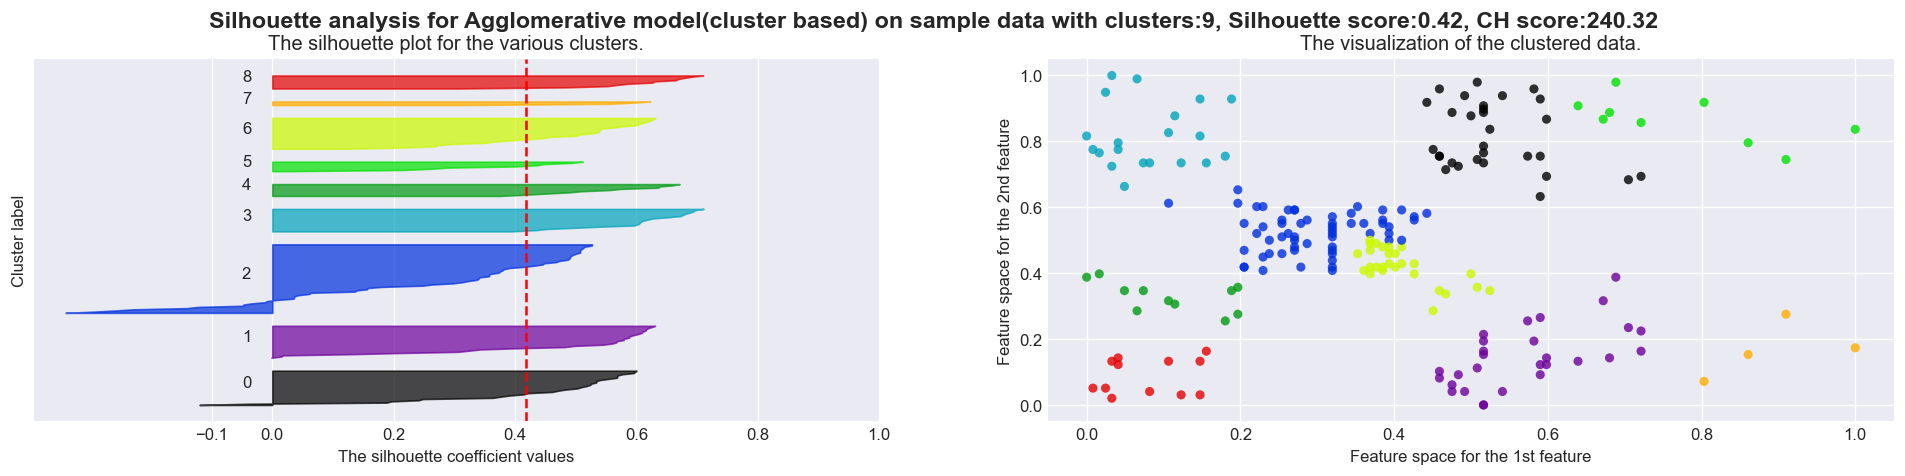

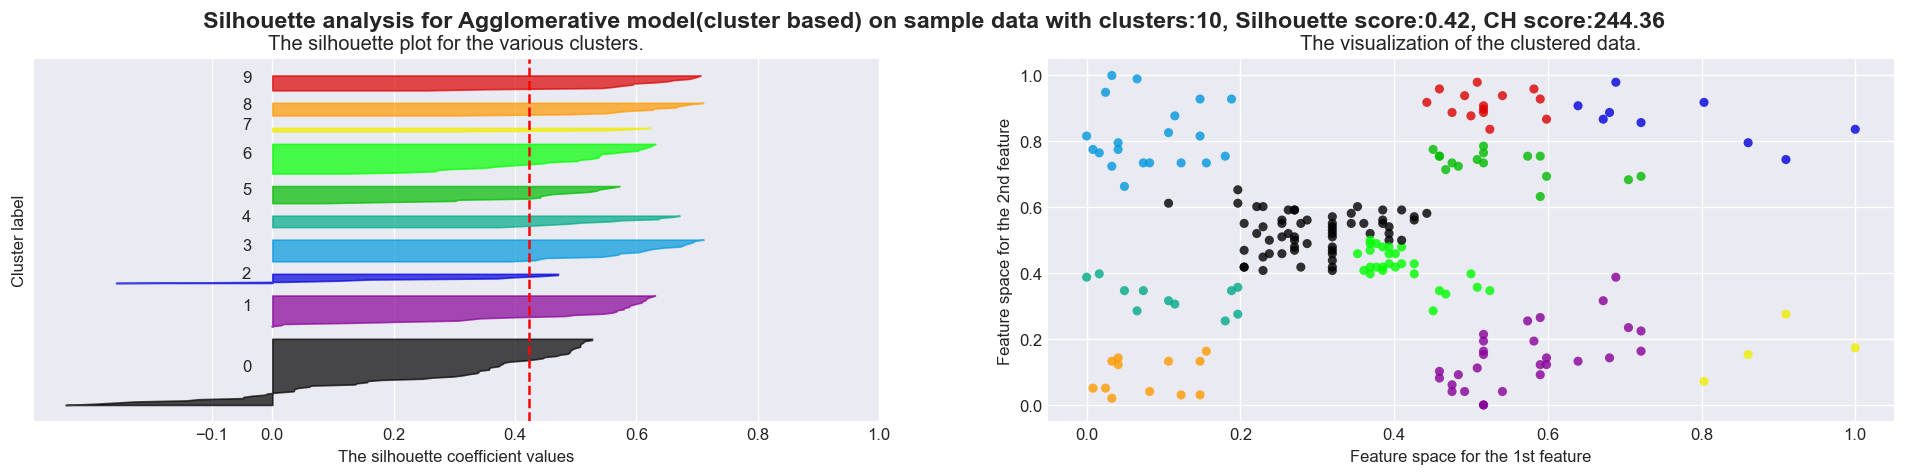

In [22]:
# storing scores to plot against cluster size
score_sil=np.array([]) 
score_ch=np.array([])  

params=np.array([])   # to store parameters of models

silhouette_avg_n_clusters = []    # for plotting purpose

clusters=np.arange(2,11) # various cluster sizes for agglomerative model
for k in clusters:
    
    '''MODEL'''
    # initialise and fit model
    model_agg1= AgglomerativeClustering( n_clusters=k).fit(X)
    # get labels for data points
    labels= model_agg1.labels_
    # store parameters for future reference
    params=np.append(params, model_agg1.get_params() )
    
    '''STORING VARIOUS SCORE VALUES'''    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)
    
    # avg silhouette score for the clustering
    silhouette_avg=silhouette_score(X,labels)
    
    # storing silhouette and CH scores for each cluster size in an array 
    score_sil=np.append(score_sil, silhouette_avg)
    score_ch=np.append(score_ch, calinski_harabasz_score(X,labels))
    
    
    '''PLOTTING'''
     # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=120)
    fig.set_size_inches(20, 4)

    
    '''FIRST PLOT'''
    # COMPUTING AND PLOTTING SILHOUETTE PLOT FOR EACH CLUSTER
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values =  sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    '''SECOND PLOT '''
    # SHOWING THE ACTUAL CLUSTERS FORMED
    colors = cm.nipy_spectral(labels.astype(float) / k)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=120, lw=0, alpha=0.8, c=colors, edgecolor='k')

    # SETTING TITLES AND LABELS
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle( (f"Silhouette analysis for Agglomerative model(cluster based) on sample data with clusters:{k}, Silhouette score:{silhouette_score(X,labels):.2f}, CH score:{calinski_harabasz_score(X,labels):.2f}"),
                   fontsize=14, fontweight='bold')
    
    plt.show()

### plotting scores for various clusters

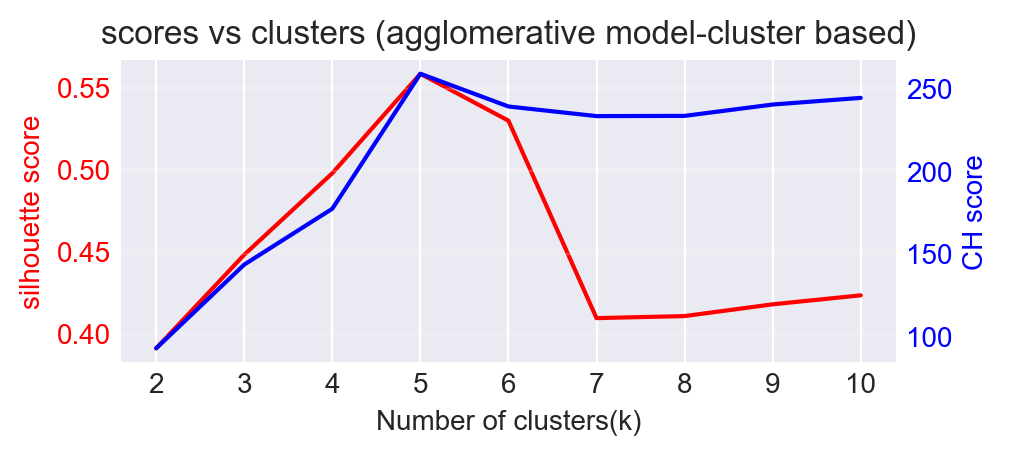

In [23]:
fig, ax= plt.subplots(figsize=(5,2), dpi=200)

# plotting silhouette score
ax.set_xlabel('Number of clusters(k)')
ax.plot(clusters, score_sil, c='red' )
ax.set_ylabel('silhouette score', c='red')
ax.tick_params(axis='y', color='red', labelcolor='red')
ax.set_xticks(clusters)
ax.yaxis.grid(alpha=0.2)

# plotting CH score on twin axis
ax1=ax.twinx()
ax1.plot(clusters, score_ch, c='blue' )
ax1.set_ylabel('CH score', c='blue')
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.yaxis.grid(alpha=0.2)

plt.title('scores vs clusters (agglomerative model-cluster based)')
plt.show()

### **Result from agglomerative algorithm by direct clustering:**
### **cluster size of 5 gives good scores**

In [24]:
# STORING BEST SCORES AND CORRESPONDING CLUSTER VALUES AND PARAMETERS

best_cluster_sil=int( clusters[np.where(score_sil==score_sil.max() ) ][0] )
print('best cluster size and distance using silhouette score:\n', (best_cluster_sil, best_dist_sil) )

best_cluster_CH=int( clusters[np.where(score_ch==score_ch.max() ) ][0] )
print('best cluster size and distance using CH score:\n', (best_cluster_CH, best_dist_CH) )

df_scores['agg_cluster_based']=[score_sil.max(), score_ch.max(), best_cluster_sil, best_cluster_CH, params[score_sil==score_sil.max()], params[score_ch==score_ch.max()]]
df_scores

best cluster size and distance using silhouette score:
 (5, 1.1)
best cluster size and distance using CH score:
 (5, 0.5)


K-means  \
Silhouette score                                            0.559485   
CH score                                                  269.379807   
Best clusters sil                                                  5   
Best clusters CH                                                   9   
Best Params sil    [{'algorithm': 'lloyd', 'copy_x': True, 'init'...   
Best Params ch     [{'algorithm': 'lloyd', 'copy_x': True, 'init'...   

                                                              dbscan  \
Silhouette score                                            0.442659   
CH score                                                   90.631977   
Best clusters sil                                                  6   
Best clusters CH                                                   6   
Best Params sil    [{'algorithm': 'auto', 'eps': 0.085, 'leaf_siz...   
Best Params ch     [{'algorithm': 'auto', 'eps': 0.085, 'leaf_siz...   

                                                      agg_dist_based  \
Silhouette score                                             0.55827   
CH score                                                  272.571303   
Best clusters sil                                                  5   
Best clusters CH                                                  14   
Best Params sil    [{'affinity': 'euclidean', 'compute_distances'...   
Best Params ch     [{'affinity': 'euclidean', 'compute_distances'...   

                                                   agg_cluster_based  
Silhouette score                                             0.55827  
CH score                                                  258.974007  
Best clusters sil                                                  5  
Best clusters CH                                                   5  
Best Params sil    [{'affinity': 'euclidean', 'compute_distances'...  
Best Params ch     [{'affinity': 'euclidean', 'compute_distances'...

# Comparing all models 

### scores for various models
### **dbscan seems to be giving lower scores as compared to other models**

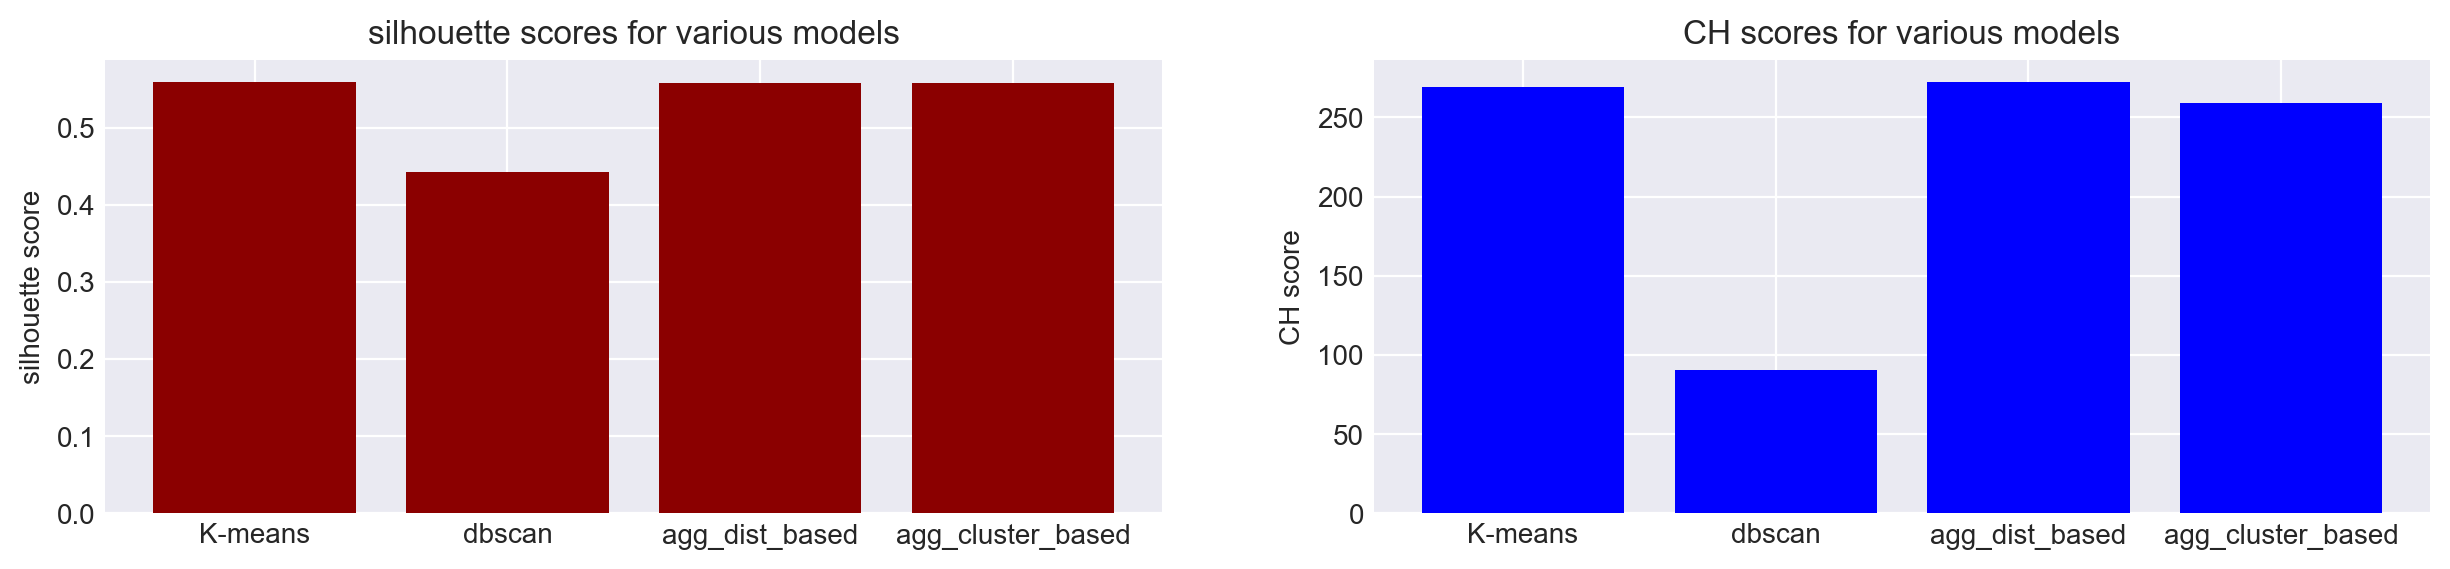

In [25]:
fig, ax=plt.subplots(1,2, figsize=(15,3), dpi=200)

#silhouette score comparison
ax[0].bar(df_scores.columns, df_scores.loc['Silhouette score'], color='darkred')
ax[0].set_title('silhouette scores for various models')
ax[0].set_ylabel('silhouette score')

# CH score comparison
ax[1].bar(df_scores.columns, df_scores.loc['CH score'], color='blue')
ax[1].set_title('CH scores for various models')
ax[1].set_ylabel('CH score')
plt.show()

### best cluster sizes by various models

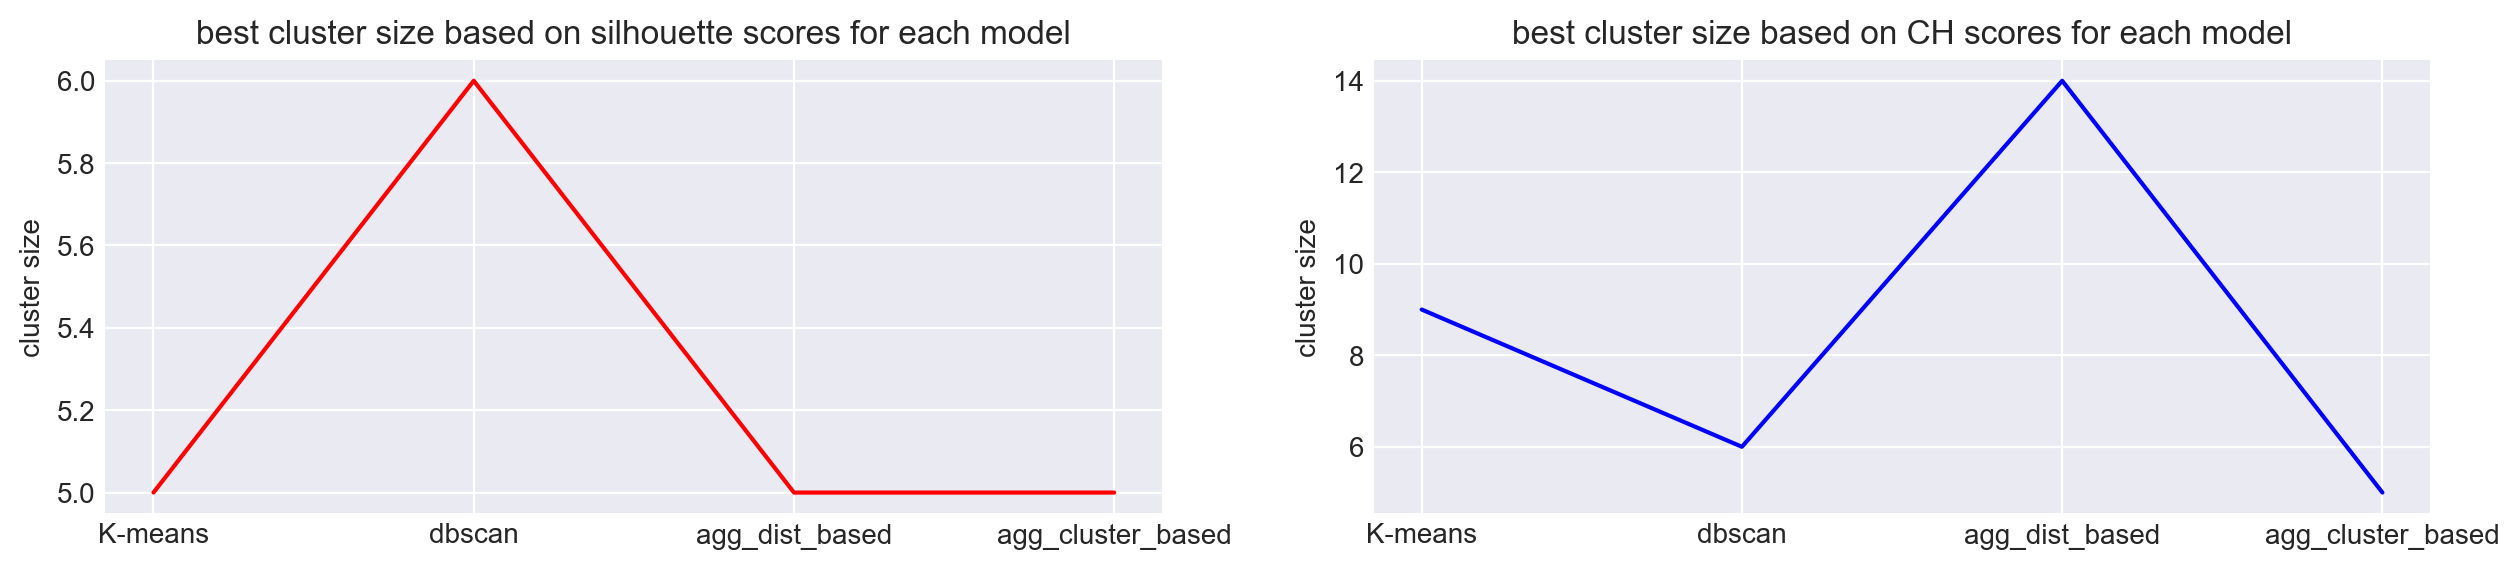

In [26]:
fig, ax=plt.subplots(1,2, figsize=(15,3), dpi=200)

ax[0].plot(df_scores.columns, df_scores.loc['Best clusters sil'], color='red', )
ax[0].set_title('best cluster size based on silhouette scores for each model')
ax[0].set_ylabel('cluster size')

ax[1].plot(df_scores.columns, df_scores.loc['Best clusters CH'], color='blue')
ax[1].set_title('best cluster size based on CH scores for each model')
ax[1].set_ylabel('cluster size')
plt.show()

# Conclusion:
# **All the models evaluated using silhouette and calinski-harabasz scores mostly recommend cluster size of 5 to 7** 
### Better cluster size can be found by applying domain knowledge